In [1]:
#import cummon module foe data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
import scipy as sc
import sklearn as sk
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
import opendatasets as od
od.download=("https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset")

In [4]:
# Unzip the downloaded file (forcing overwrite)
!powershell Expand-Archive -Path heart-attack-analysis-prediction-dataset.zip -DestinationPath . -Force

In [5]:

# Read the CSV files
df_heart = pd.read_csv('heart.csv')
df_o2 = pd.read_csv('o2Saturation.csv')

# Now you can work with the DataFrames 'df_heart' and 'df_o2'

In [6]:
# Initial inspection
display(df_heart.head())
print("Dataset shape:", df_heart.shape)
df_heart.info()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

Dataset shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
column_renaming = {
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'ChestPainType',
    'trtbps': 'RestingBloodPressure',
    'chol': 'Cholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestEcg',
    'thalachh': 'MaxHeartRate',
    'exng': 'ExerciseInducedAngina',
    'oldpeak': 'OldPeak',
    'slp': 'StSlope',
    'caa': 'VesselsCount',
    'thall': 'Thalassemia',
    'output': 'HeartAttackOutput'
}

df_heart = df_heart.rename(column_renaming,axis=1)

In [9]:
columns = df_heart.columns.copy()
columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestEcg', 'MaxHeartRate', 'ExerciseInducedAngina',
       'OldPeak', 'StSlope', 'VesselsCount', 'Thalassemia',
       'HeartAttackOutput'],
      dtype='object')

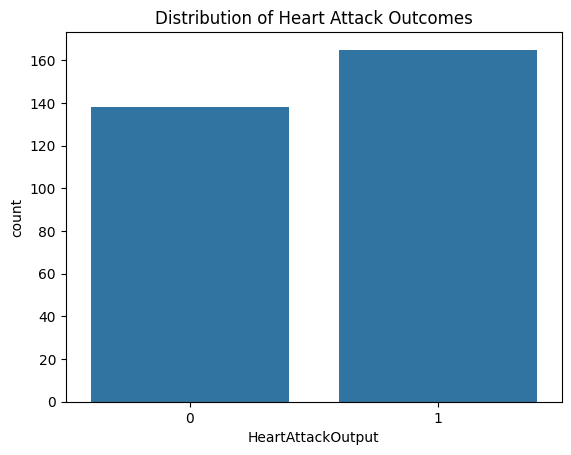

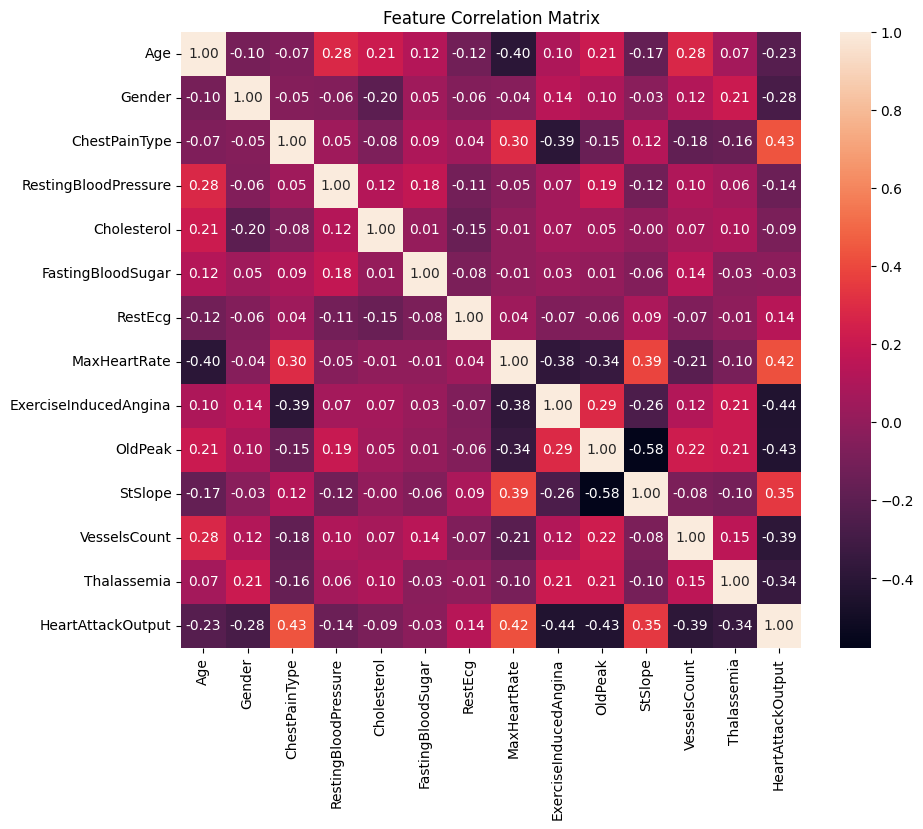

In [10]:
# Distribution of target variable
sns.countplot(x='HeartAttackOutput', data=df_heart)  # Adjust 'HeartAttackOutput' as necessary
plt.title('Distribution of Heart Attack Outcomes')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_heart.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [11]:
# Example of removing outliers
from scipy import stats
df_heart = df_heart[(np.abs(stats.zscore(df_heart.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

# Encoding categorical variables (if not already done)
df_heart = pd.get_dummies(df_heart, drop_first=True)

print("Advanced preprocessing applied.")

Advanced preprocessing applied.


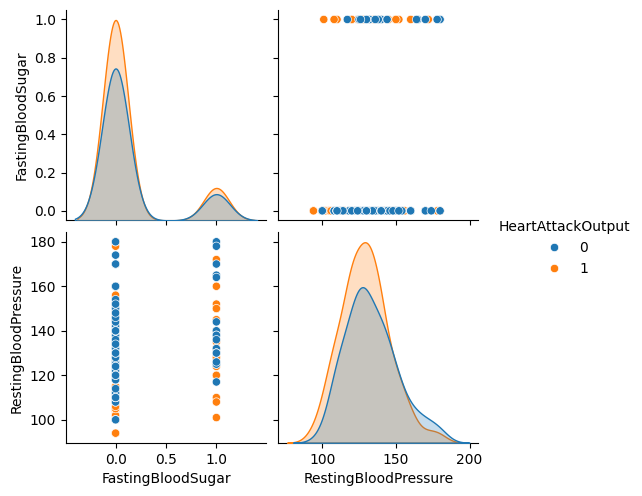

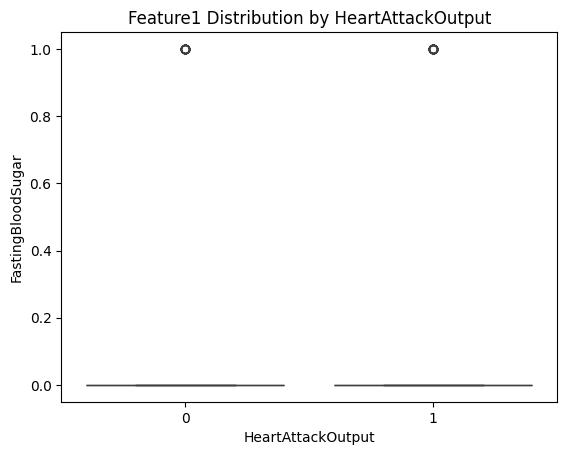

In [12]:
# Pairplot for a subset of features against the target variable
sns.pairplot(df_heart[['FastingBloodSugar', 'RestingBloodPressure', 'HeartAttackOutput']], hue='HeartAttackOutput')
plt.show()

# Boxplot for numerical features against the target variable
sns.boxplot(x='HeartAttackOutput', y='FastingBloodSugar', data=df_heart)
plt.title('Feature1 Distribution by HeartAttackOutput')
plt.show()

In [13]:
df_heart.isnull()

Age  Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
0    False   False          False                 False        False   
1    False   False          False                 False        False   
2    False   False          False                 False        False   
3    False   False          False                 False        False   
4    False   False          False                 False        False   
..     ...     ...            ...                   ...          ...   
298  False   False          False                 False        False   
299  False   False          False                 False        False   
300  False   False          False                 False        False   
301  False   False          False                 False        False   
302  False   False          False                 False        False   

     FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
0                False    False         False                  False    False   
1                False    False         False                  False    False   
2                False    False         False                  False    False   
3                False    False         False                  False    False   
4                False    False         False                  False    False   
..                 ...      ...           ...                    ...      ...   
298              False    False         False                  False    False   
299              False    False         False                  False    False   
300              False    False         False                  False    False   
301              False    False         False                  False    False   
302              False    False         False                  False    False   

     StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
0      False         False        False              False  
1      False         False        False              False  
2      False         False        False              False  
3      False         False        False              False  
4      False         False        False              False  
..       ...           ...          ...                ...  
298    False         False        False              False  
299    False         False        False              False  
300    False         False        False              False  
301    False         False        False              False  
302    False         False        False              False  

[287 rows x 14 columns]

In [14]:
df_heart.isnull().sum()/len(df_heart)*100

Age                      0.0
Gender                   0.0
ChestPainType            0.0
RestingBloodPressure     0.0
Cholesterol              0.0
FastingBloodSugar        0.0
RestEcg                  0.0
MaxHeartRate             0.0
ExerciseInducedAngina    0.0
OldPeak                  0.0
StSlope                  0.0
VesselsCount             0.0
Thalassemia              0.0
HeartAttackOutput        0.0
dtype: float64

In [15]:
df_heart.describe()

Age      Gender  ChestPainType  RestingBloodPressure  \
count  287.000000  287.000000     287.000000            287.000000   
mean    54.334495    0.689895       0.972125            131.024390   
std      9.093125    0.463344       1.037373             16.991856   
min     29.000000    0.000000       0.000000             94.000000   
25%     47.000000    0.000000       0.000000            120.000000   
50%     55.000000    1.000000       1.000000            130.000000   
75%     61.000000    1.000000       2.000000            140.000000   
max     77.000000    1.000000       3.000000            180.000000   

       Cholesterol  FastingBloodSugar     RestEcg  MaxHeartRate  \
count   287.000000         287.000000  287.000000    287.000000   
mean    244.501742           0.142857    0.533101    149.804878   
std      45.920719           0.350538    0.527017     22.550570   
min     126.000000           0.000000    0.000000     88.000000   
25%     211.000000           0.000000    0.000000    133.500000   
50%     241.000000           0.000000    1.000000    153.000000   
75%     274.000000           0.000000    1.000000    166.000000   
max     394.000000           1.000000    2.000000    202.000000   

       ExerciseInducedAngina     OldPeak     StSlope  VesselsCount  \
count             287.000000  287.000000  287.000000    287.000000   
mean                0.327526    1.004878    1.411150      0.658537   
std                 0.470131    1.080684    0.607311      0.924675   
min                 0.000000    0.000000    0.000000      0.000000   
25%                 0.000000    0.000000    1.000000      0.000000   
50%                 0.000000    0.800000    1.000000      0.000000   
75%                 1.000000    1.600000    2.000000      1.000000   
max                 1.000000    4.400000    2.000000      3.000000   

       Thalassemia  HeartAttackOutput  
count   287.000000         287.000000  
mean      2.313589           0.550523  
std       0.584703           0.498310  
min       1.000000           0.000000  
25%       2.000000           0.000000  
50%       2.000000           1.000000  
75%       3.000000           1.000000  
max       3.000000           1.000000

In [16]:
import pandas as pd
# Select numerical columns
numerical_columns = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']
numerical_columns

['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

In [17]:
df_heart.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestEcg', 'MaxHeartRate', 'ExerciseInducedAngina',
       'OldPeak', 'StSlope', 'VesselsCount', 'Thalassemia',
       'HeartAttackOutput'],
      dtype='object')

In [18]:
import missingno as msno
import matplotlib.pyplot as plt

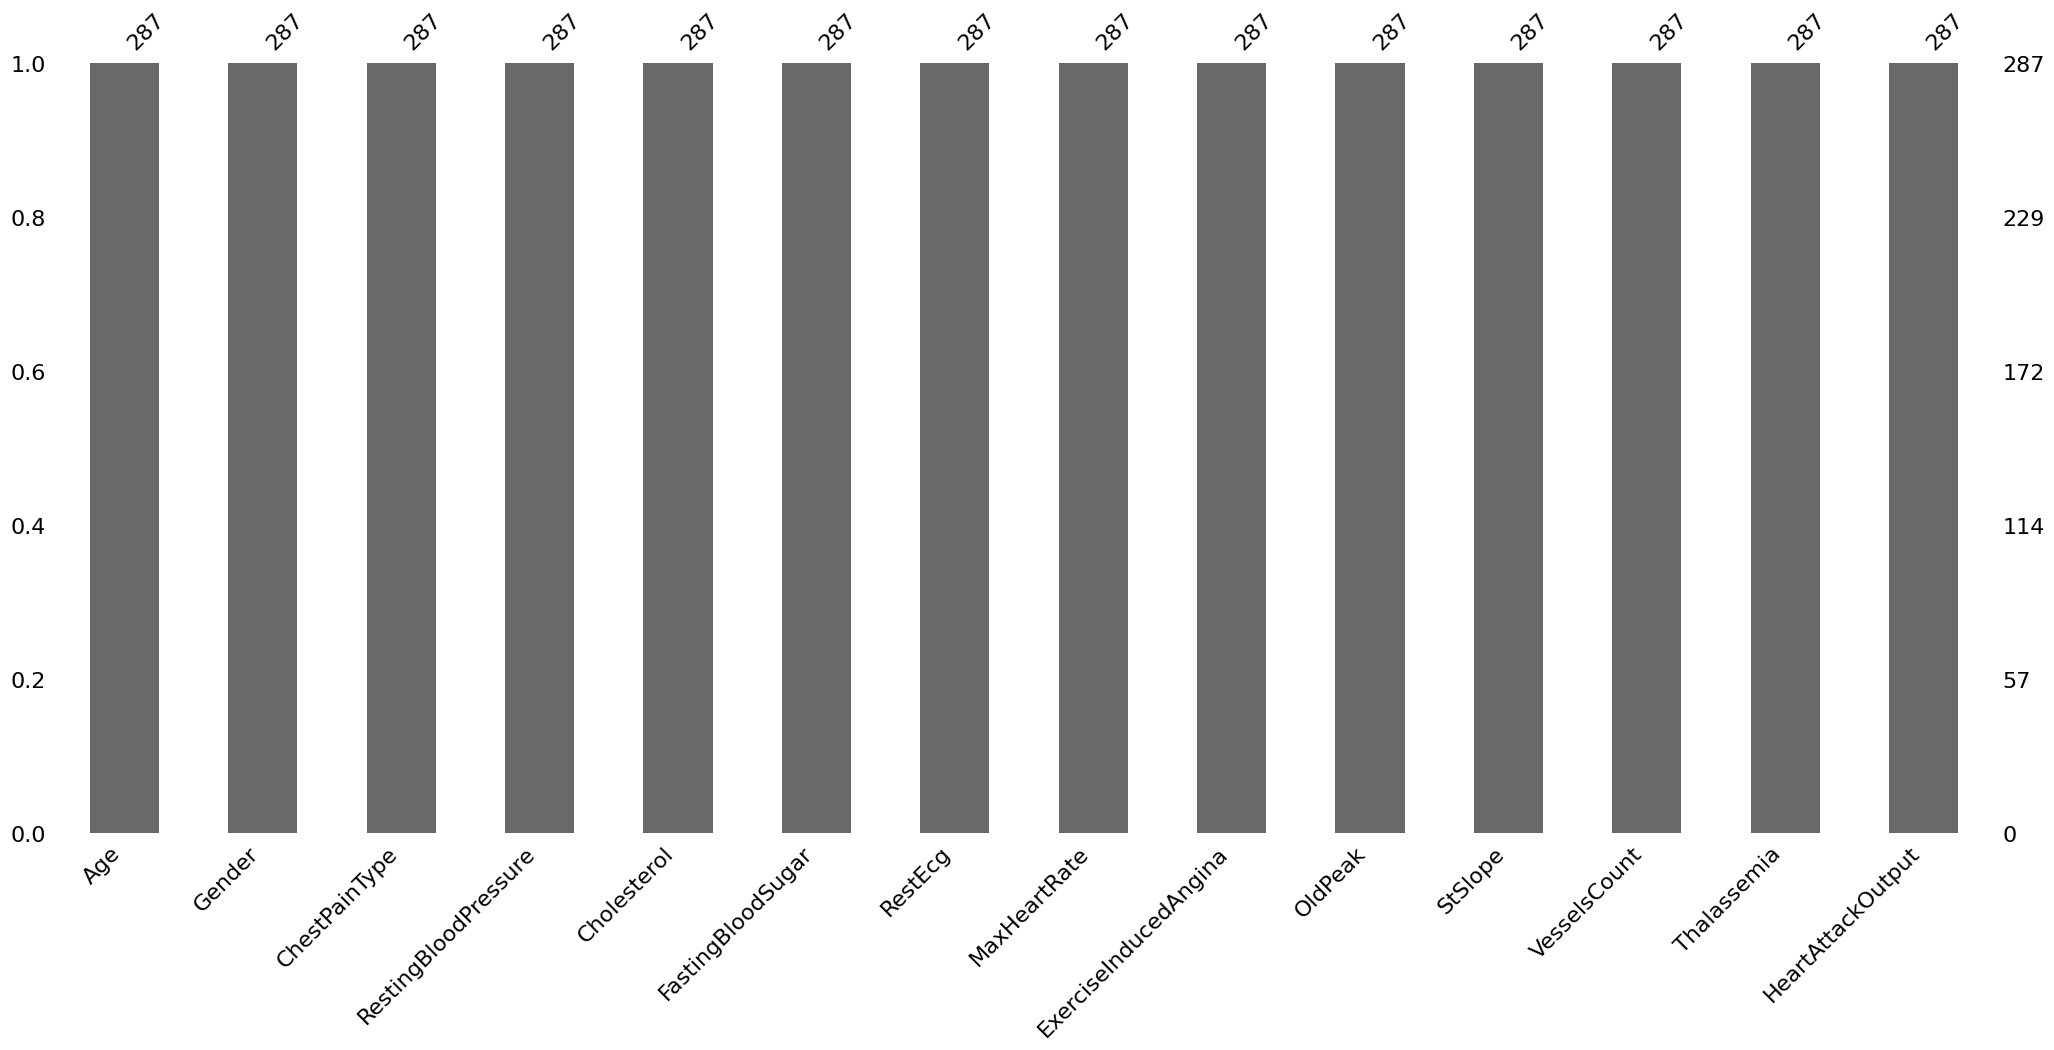

In [19]:
msno.bar(df_heart)
plt.show()

<Axes: >

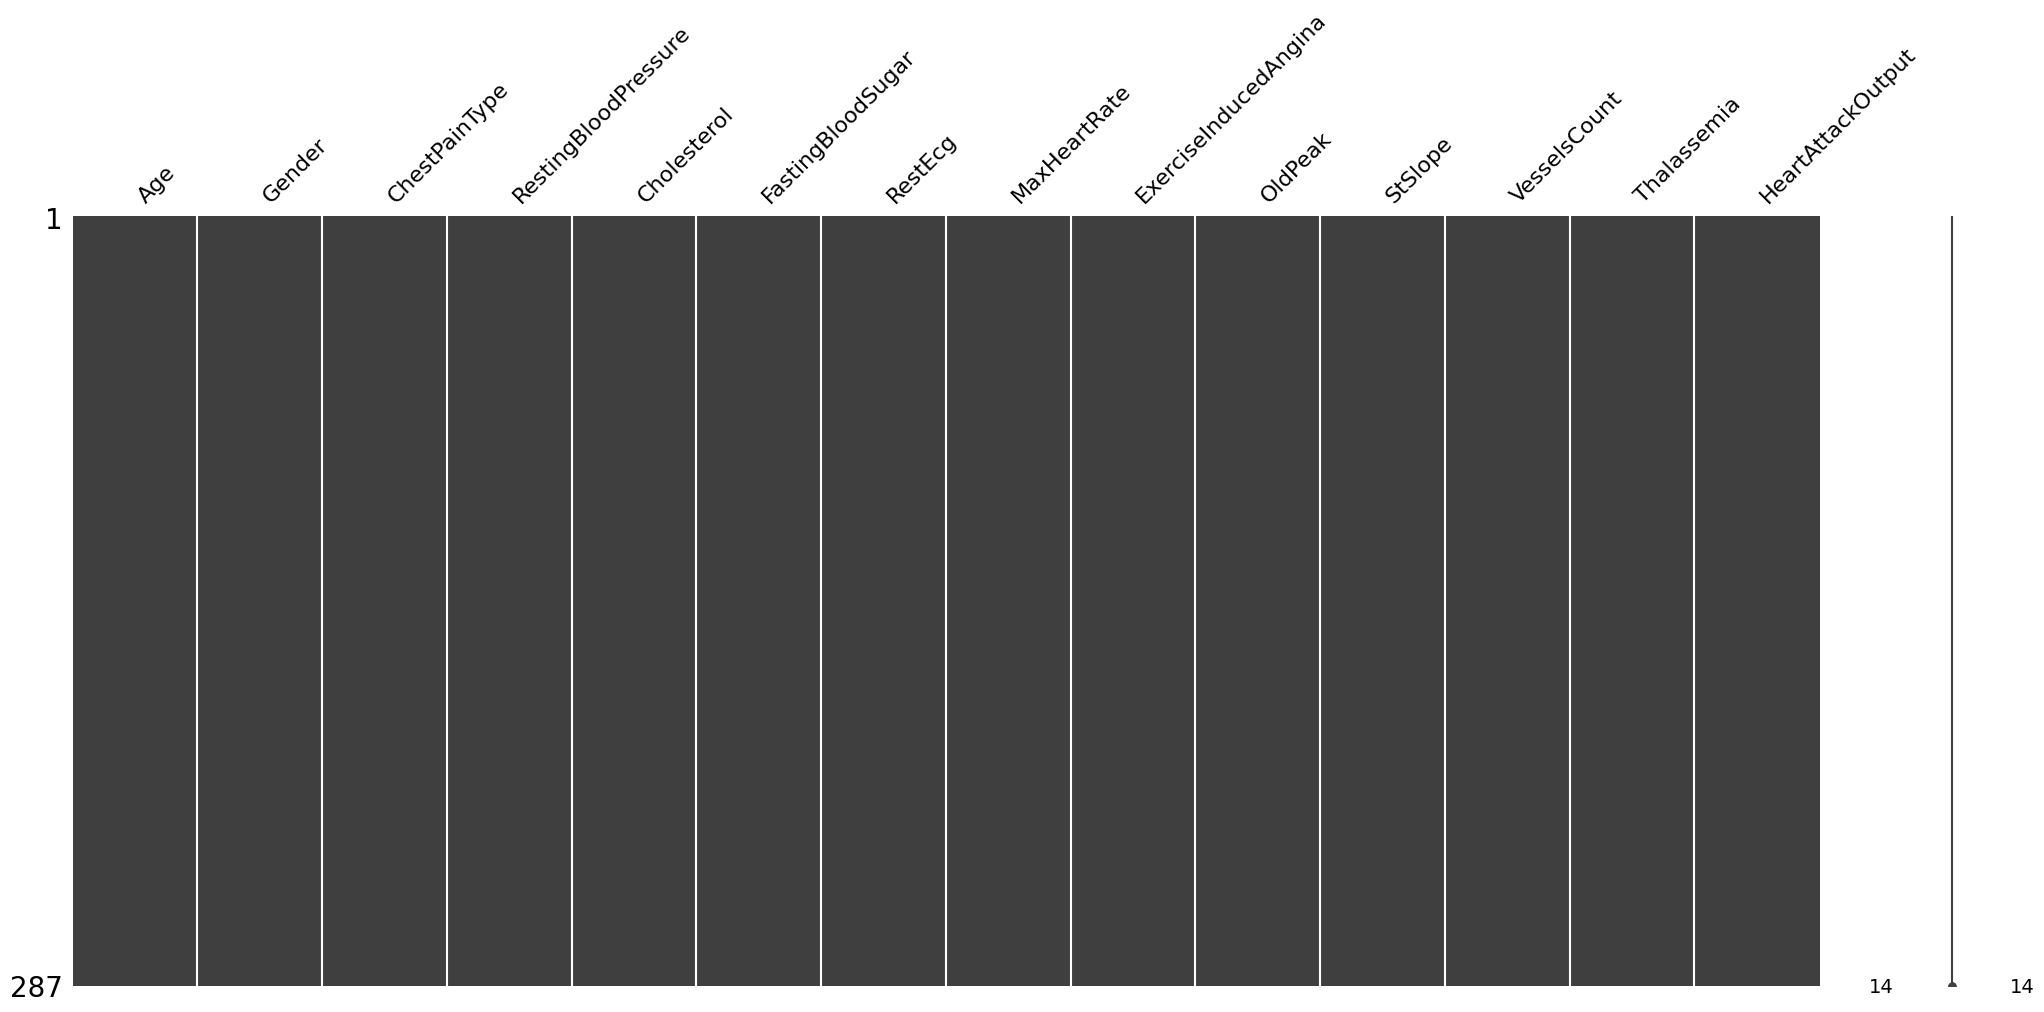

In [20]:
msno.matrix(df_heart)

In [21]:
df_heart.head(10)

Age  Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
0   63       1              3                   145          233   
1   37       1              2                   130          250   
2   41       0              1                   130          204   
3   56       1              1                   120          236   
4   57       0              0                   120          354   
5   57       1              0                   140          192   
6   56       0              1                   140          294   
7   44       1              1                   120          263   
8   52       1              2                   172          199   
9   57       1              2                   150          168   

   FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
0                  1        0           150                      0      2.3   
1                  0        1           187                      0      3.5   
2                  0        0           172                      0      1.4   
3                  0        1           178                      0      0.8   
4                  0        1           163                      1      0.6   
5                  0        1           148                      0      0.4   
6                  0        0           153                      0      1.3   
7                  0        1           173                      0      0.0   
8                  1        1           162                      0      0.5   
9                  0        1           174                      0      1.6   

   StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
0        0             0            1                  1  
1        0             0            2                  1  
2        2             0            2                  1  
3        2             0            2                  1  
4        2             0            2                  1  
5        1             0            1                  1  
6        1             0            2                  1  
7        2             0            3                  1  
8        2             0            3                  1  
9        2             0            2                  1

In [22]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    287 non-null    int64  
 1   Gender                 287 non-null    int64  
 2   ChestPainType          287 non-null    int64  
 3   RestingBloodPressure   287 non-null    int64  
 4   Cholesterol            287 non-null    int64  
 5   FastingBloodSugar      287 non-null    int64  
 6   RestEcg                287 non-null    int64  
 7   MaxHeartRate           287 non-null    int64  
 8   ExerciseInducedAngina  287 non-null    int64  
 9   OldPeak                287 non-null    float64
 10  StSlope                287 non-null    int64  
 11  VesselsCount           287 non-null    int64  
 12  Thalassemia            287 non-null    int64  
 13  HeartAttackOutput      287 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.6 KB


In [23]:
# Assuming 'df_heart' is your DataFrame
cols = df_heart.columns
num_cols = df_heart._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [24]:
df_heart._get_numeric_data()

Age  Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
0     63       1              3                   145          233   
1     37       1              2                   130          250   
2     41       0              1                   130          204   
3     56       1              1                   120          236   
4     57       0              0                   120          354   
..   ...     ...            ...                   ...          ...   
298   57       0              0                   140          241   
299   45       1              3                   110          264   
300   68       1              0                   144          193   
301   57       1              0                   130          131   
302   57       0              1                   130          236   

     FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
0                    1        0           150                      0      2.3   
1                    0        1           187                      0      3.5   
2                    0        0           172                      0      1.4   
3                    0        1           178                      0      0.8   
4                    0        1           163                      1      0.6   
..                 ...      ...           ...                    ...      ...   
298                  0        1           123                      1      0.2   
299                  0        1           132                      0      1.2   
300                  1        1           141                      0      3.4   
301                  0        1           115                      1      1.2   
302                  0        0           174                      0      0.0   

     StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
0          0             0            1                  1  
1          0             0            2                  1  
2          2             0            2                  1  
3          2             0            2                  1  
4          2             0            2                  1  
..       ...           ...          ...                ...  
298        1             0            3                  0  
299        1             0            3                  0  
300        1             2            3                  0  
301        1             1            3                  0  
302        1             1            2                  0  

[287 rows x 14 columns]

In [25]:
cat_cols

[]

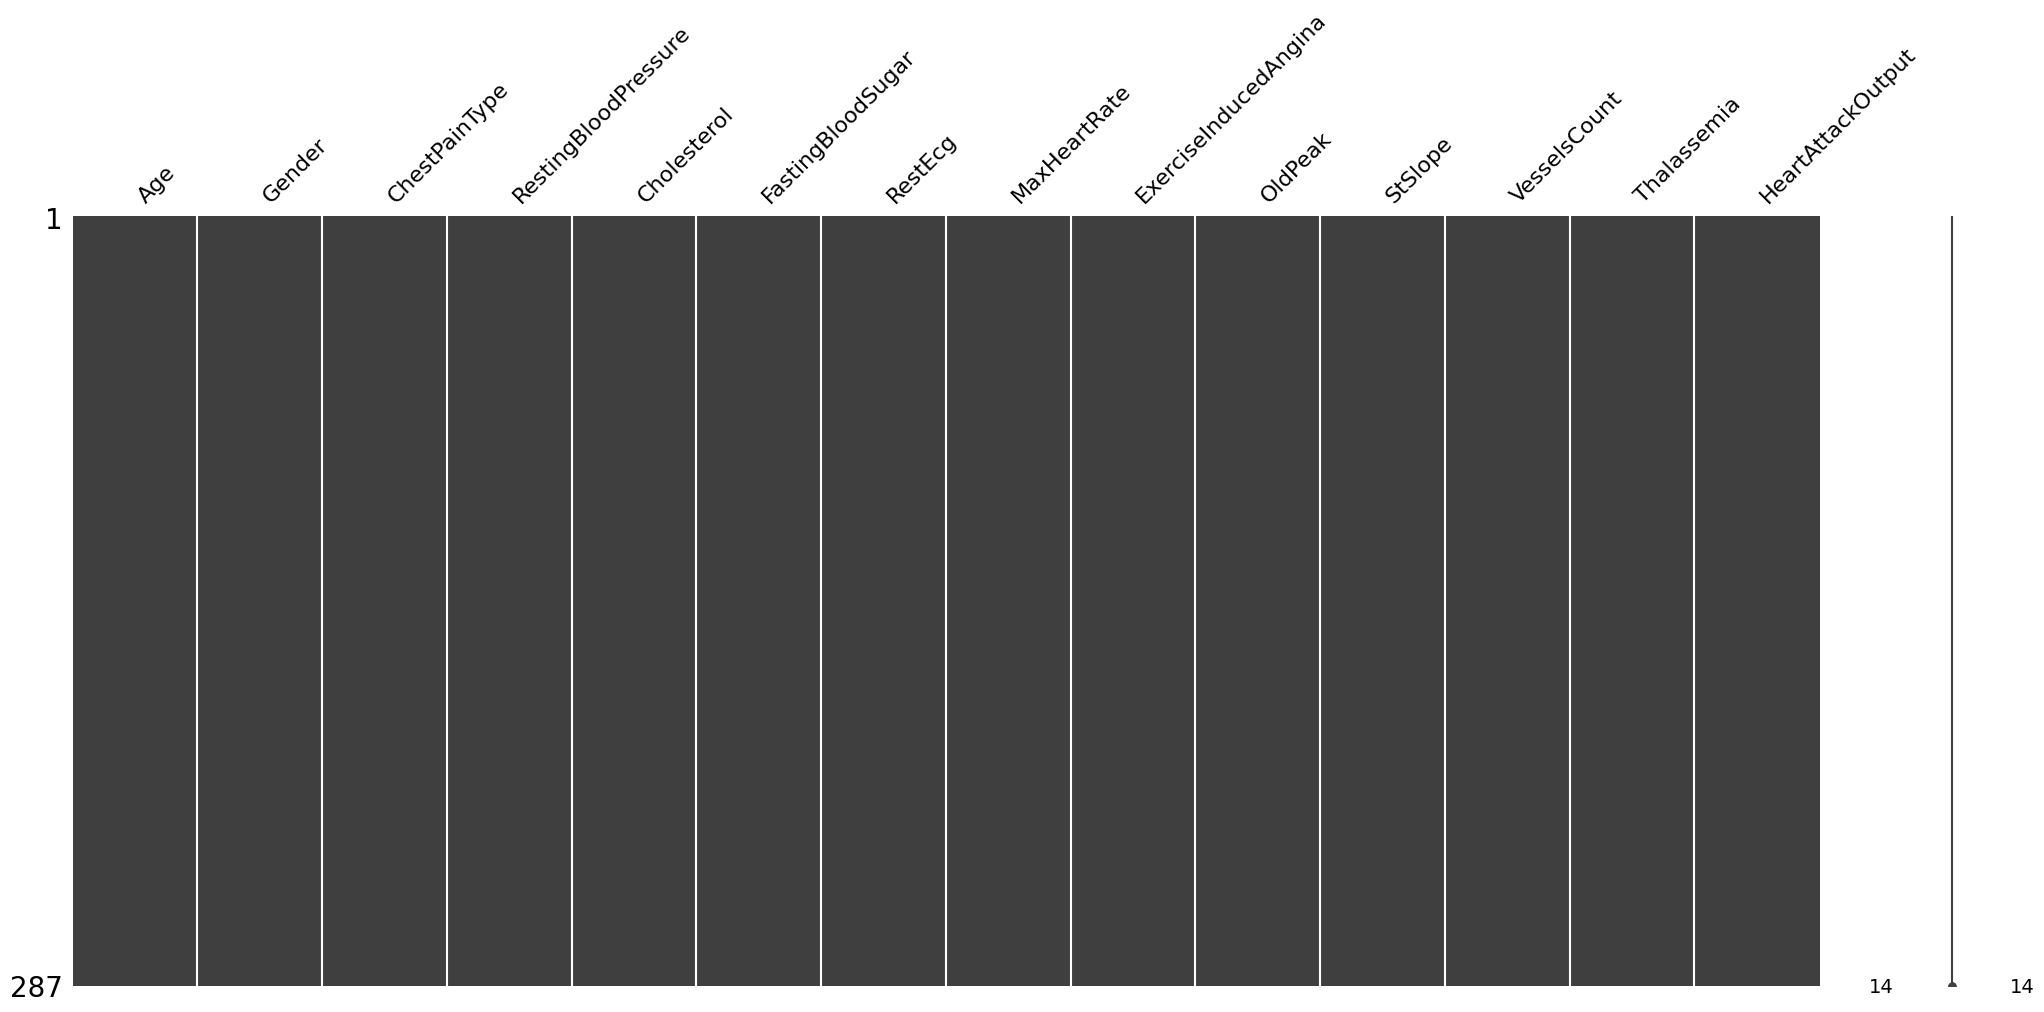

In [26]:
msno.matrix(df_heart)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

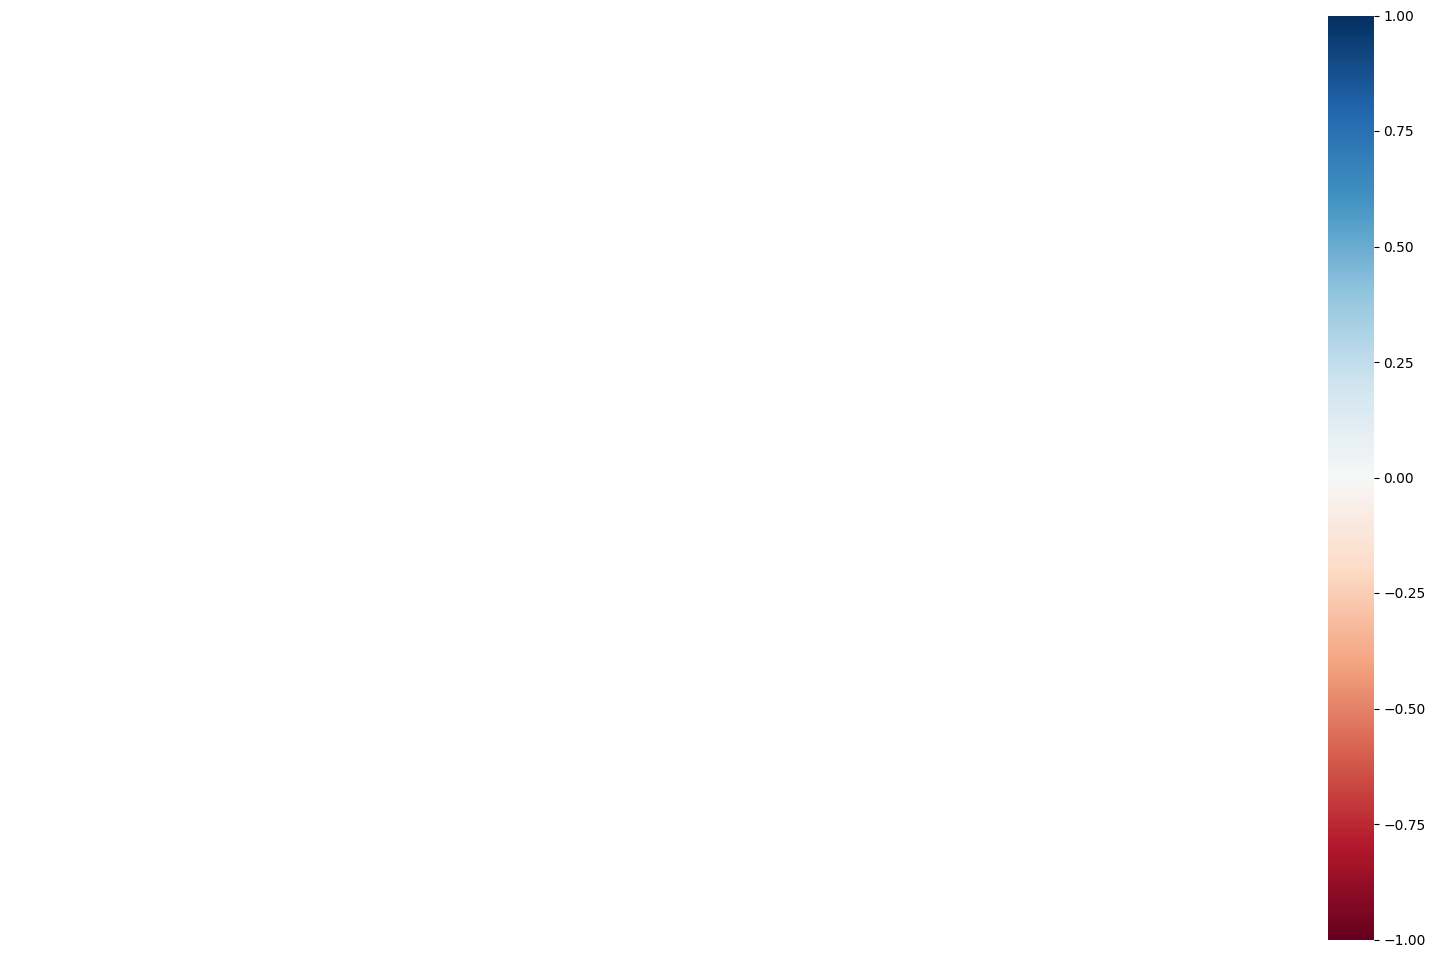

In [27]:
msno.heatmap(df_heart)
plt.show

In [28]:
df_heart.duplicated().sum()

0

In [29]:
import pandas as pd
# Find the duplicated row(s)
duplicated_mask = df_heart.duplicated()

# Select and display the duplicated row(s)
duplicated_rows = df_heart[duplicated_mask]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [Age, Gender, ChestPainType, RestingBloodPressure, Cholesterol, FastingBloodSugar, RestEcg, MaxHeartRate, ExerciseInducedAngina, OldPeak, StSlope, VesselsCount, Thalassemia, HeartAttackOutput]
Index: []


Summary Statistics of Outliers:
             Age    Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
count   2.000000  2.000000            2.0              2.000000     2.000000   
mean   60.000000  0.500000            0.0            127.000000   356.000000   
std     2.828427  0.707107            0.0             18.384776    53.740115   
min    58.000000  0.000000            0.0            114.000000   318.000000   
25%    59.000000  0.250000            0.0            120.500000   337.000000   
50%    60.000000  0.500000            0.0            127.000000   356.000000   
75%    61.000000  0.750000            0.0            133.500000   375.000000   
max    62.000000  1.000000            0.0            140.000000   394.000000   

       FastingBloodSugar   RestEcg  MaxHeartRate  ExerciseInducedAngina  \
count                2.0  2.000000      2.000000                    2.0   
mean                 0.0  1.000000    148.500000                    0.0   
std                  0

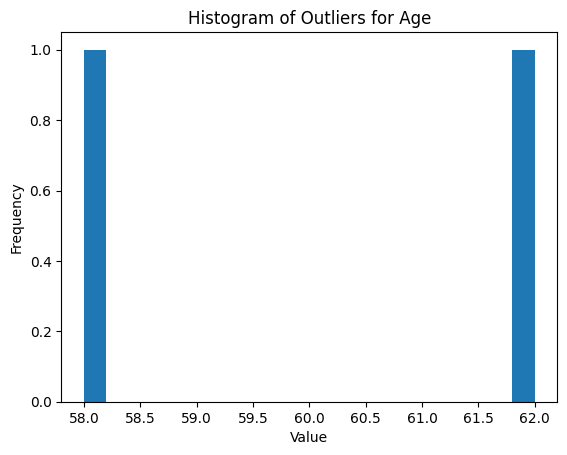

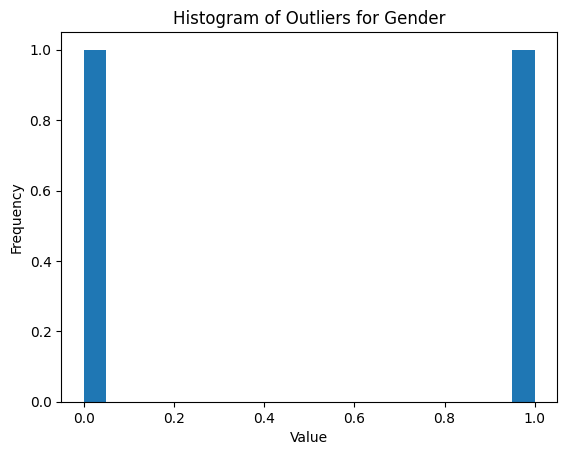

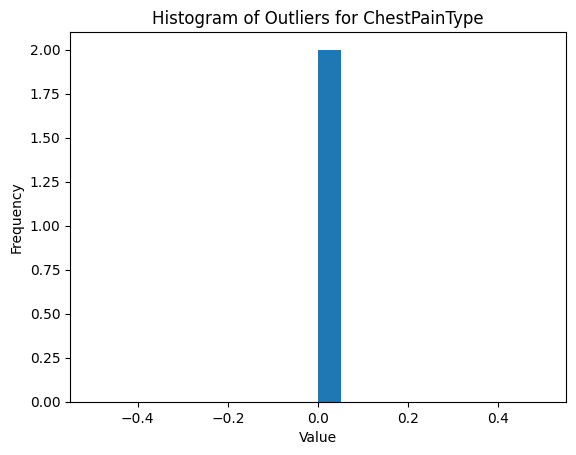

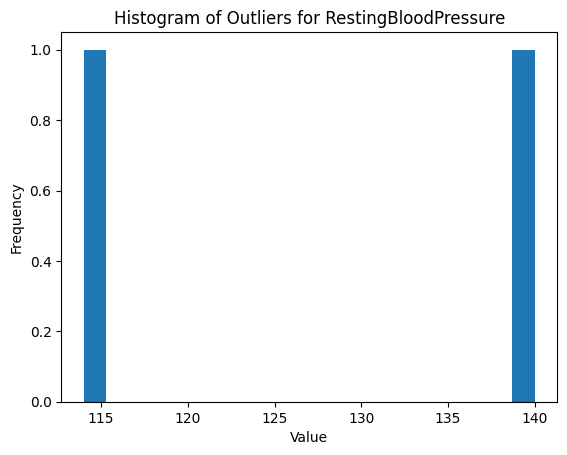

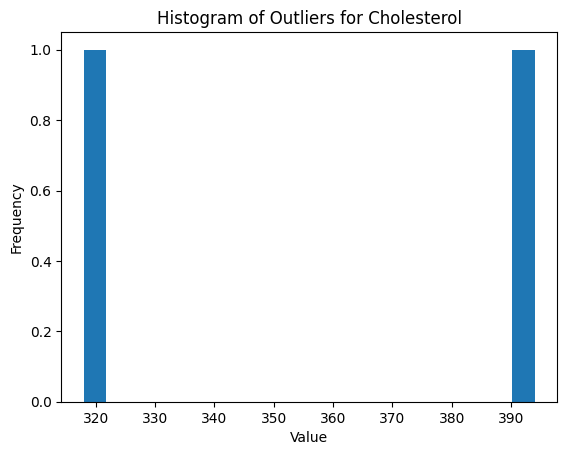

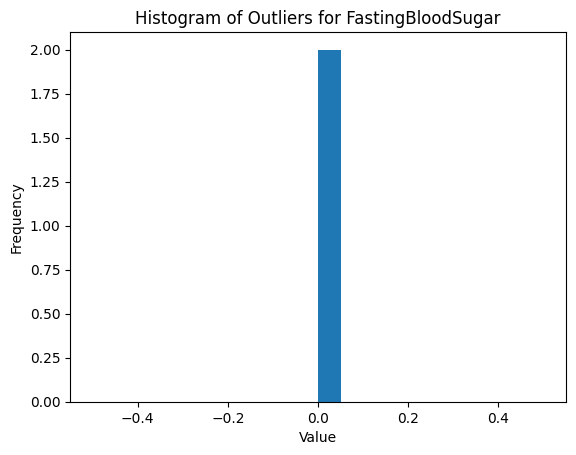

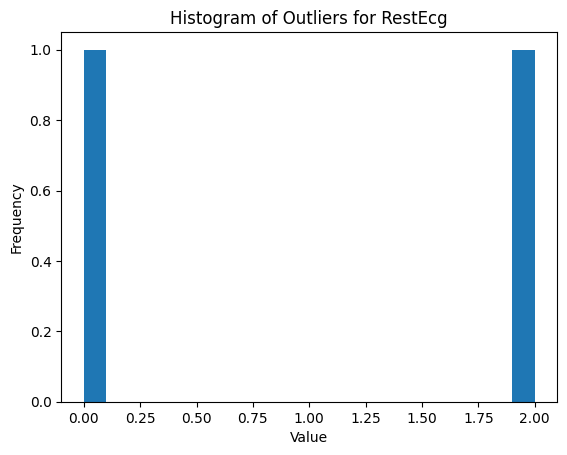

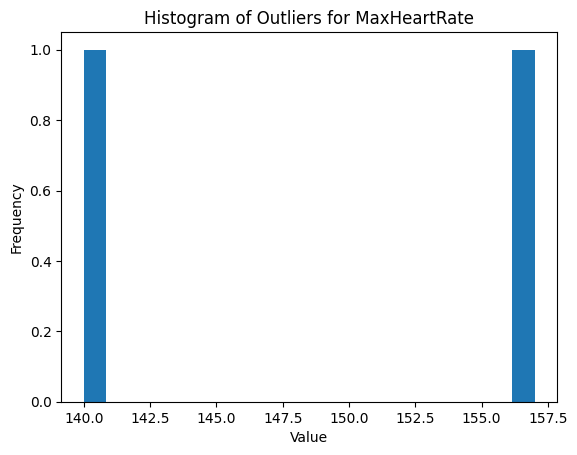

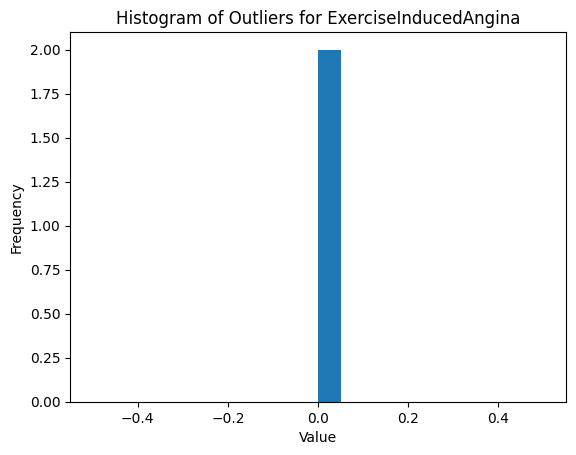

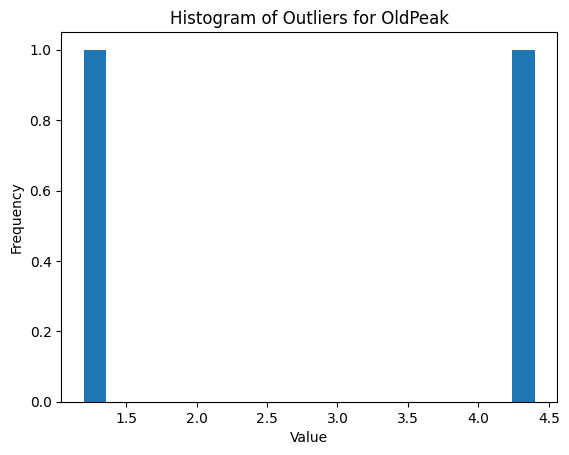

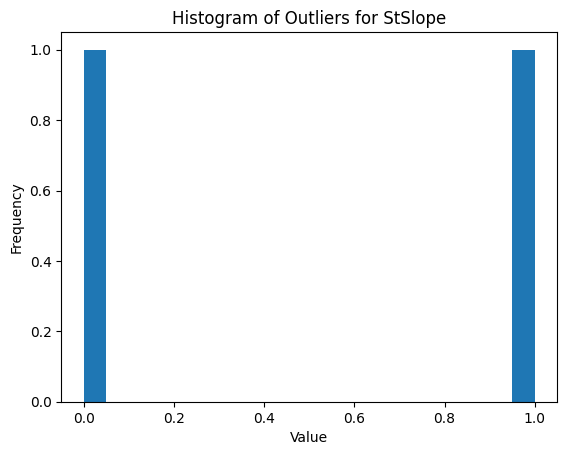

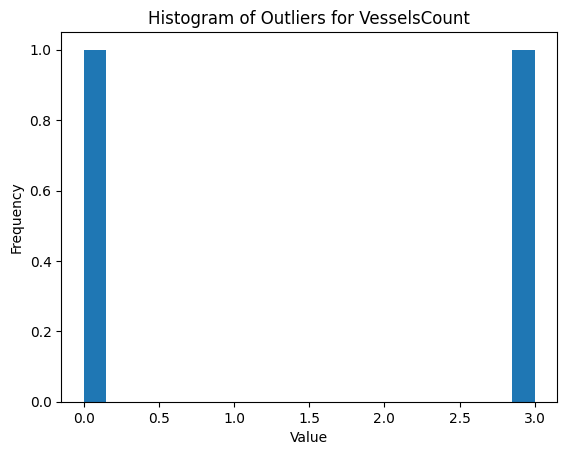

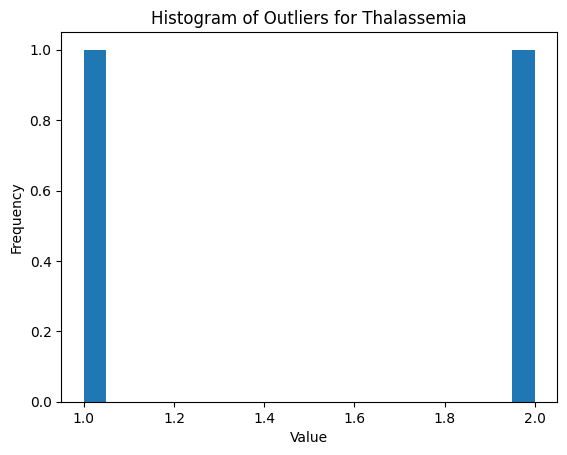

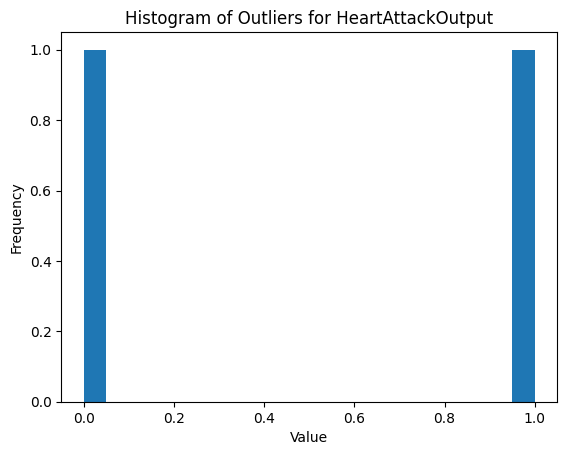


Comparison with Original Data:
Original Values:
     Age  Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
96    62       0              0                   140          394   
291   58       1              0                   114          318   

     FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
96                   0        0           157                      0      1.2   
291                  0        2           140                      0      4.4   

     StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
96         1             0            2                  1  
291        0             3            1                  0  

Outlier Values:
     Age  Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
96    62       0              0                   140          394   
291   58       1              0                   114          318   

     FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
96  

In [30]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

def remove_outliers(df_heart, threshold=3):
    """
    Remove outliers from all numerical columns in the DataFrame using Z-score method.
    :param df_heart: DataFrame
    :param threshold: Z-score threshold for identifying outliers
    :return: DataFrame without outliers, DataFrame with outliers
    """
    # Selecting only numerical columns
    numerical_columns = df_heart.select_dtypes(include='number').columns
    
    # DataFrame to store outliers
    outliers_df = pd.DataFrame()
    
    # Loop through each numerical column
    for column in numerical_columns:
        z_scores = stats.zscore(df_heart[column])
        outliers = (z_scores > threshold) | (z_scores < -threshold)
        
        # Store unique outliers in the outliers_df DataFrame
        outliers_df = pd.concat([outliers_df, df_heart[outliers]]).drop_duplicates()
        
        # Filter the DataFrame to exclude outliers
        df_heart = df_heart[~outliers]
    
    # Handling categorical columns
    categorical_columns = ['FastingBloodSugar', 'ExerciseInducedAngina', 'VesselsCount', 'HeartAttackOutput']
    for column in categorical_columns:
        value_counts_mapping = df_heart[column].map(df_heart[column].value_counts().to_dict())
        df_heart[column] = df_heart[column].astype(str) + ' (' + value_counts_mapping.astype(str) + ' occurrences)'
    
    return df_heart, outliers_df

# Example usage:
# Assuming df_heart is your DataFrame
df_without_outliers, outliers_df = remove_outliers(df_heart)

# Now df_without_outliers contains the DataFrame without outliers in any numerical column
# outliers_df contains the DataFrame with the outliers that were removed

# Analyze outliers_df
# 1. Summary Statistics
summary_stats_outliers = outliers_df.describe()
print("Summary Statistics of Outliers:")
print(summary_stats_outliers)

# 2. Visualization (Histograms for all numerical columns)
for column in outliers_df.select_dtypes(include='number').columns:
    plt.hist(outliers_df[column], bins=20)
    plt.title(f'Histogram of Outliers for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# 3. Compare with Original Data
original_values = df_heart[df_heart.index.isin(outliers_df.index)]
print("\nComparison with Original Data:")
print("Original Values:")
print(original_values.head())

print("\nOutlier Values:")
print(outliers_df.head())

In [31]:
df_heart.tail()

Age  Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
298   57       0              0                   140          241   
299   45       1              3                   110          264   
300   68       1              0                   144          193   
301   57       1              0                   130          131   
302   57       0              1                   130          236   

     FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
298                  0        1           123                      1      0.2   
299                  0        1           132                      0      1.2   
300                  1        1           141                      0      3.4   
301                  0        1           115                      1      1.2   
302                  0        0           174                      0      0.0   

     StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
298        1             0            3                  0  
299        1             0            3                  0  
300        1             2            3                  0  
301        1             1            3                  0  
302        1             1            2                  0

In [32]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    287 non-null    int64  
 1   Gender                 287 non-null    int64  
 2   ChestPainType          287 non-null    int64  
 3   RestingBloodPressure   287 non-null    int64  
 4   Cholesterol            287 non-null    int64  
 5   FastingBloodSugar      287 non-null    int64  
 6   RestEcg                287 non-null    int64  
 7   MaxHeartRate           287 non-null    int64  
 8   ExerciseInducedAngina  287 non-null    int64  
 9   OldPeak                287 non-null    float64
 10  StSlope                287 non-null    int64  
 11  VesselsCount           287 non-null    int64  
 12  Thalassemia            287 non-null    int64  
 13  HeartAttackOutput      287 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.6 KB


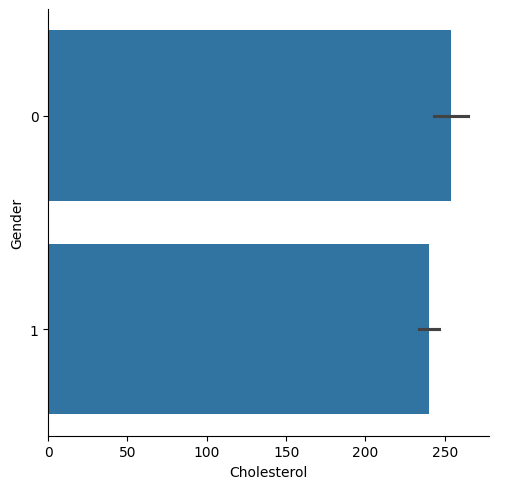

In [33]:
df_heart['Gender'] = df_heart['Gender'].astype('category')
sns.catplot(data=df_heart, y='Gender', x='Cholesterol', kind='bar')
plt.show()

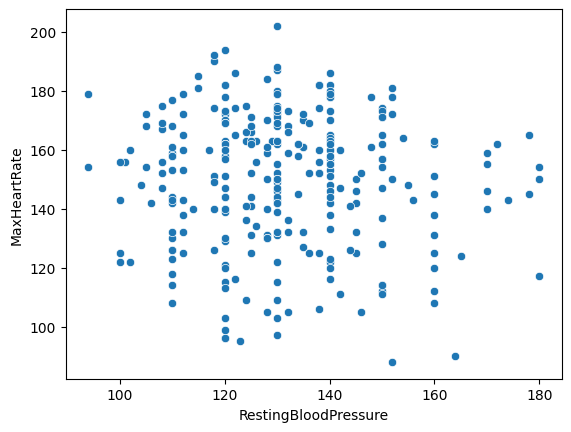

In [34]:
sns.scatterplot(data=df_heart,y='MaxHeartRate', x='RestingBloodPressure')
plt.show()

<Axes: xlabel='RestingBloodPressure', ylabel='MaxHeartRate'>

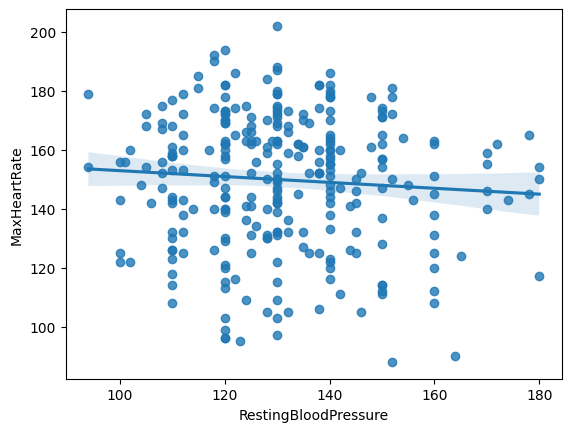

In [35]:
sns.regplot(data=df_heart,y='MaxHeartRate', x='RestingBloodPressure')

In [36]:
df_heart.head(10)

Age Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
0   63      1              3                   145          233   
1   37      1              2                   130          250   
2   41      0              1                   130          204   
3   56      1              1                   120          236   
4   57      0              0                   120          354   
5   57      1              0                   140          192   
6   56      0              1                   140          294   
7   44      1              1                   120          263   
8   52      1              2                   172          199   
9   57      1              2                   150          168   

   FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
0                  1        0           150                      0      2.3   
1                  0        1           187                      0      3.5   
2                  0        0           172                      0      1.4   
3                  0        1           178                      0      0.8   
4                  0        1           163                      1      0.6   
5                  0        1           148                      0      0.4   
6                  0        0           153                      0      1.3   
7                  0        1           173                      0      0.0   
8                  1        1           162                      0      0.5   
9                  0        1           174                      0      1.6   

   StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
0        0             0            1                  1  
1        0             0            2                  1  
2        2             0            2                  1  
3        2             0            2                  1  
4        2             0            2                  1  
5        1             0            1                  1  
6        1             0            2                  1  
7        2             0            3                  1  
8        2             0            3                  1  
9        2             0            2                  1

In [37]:
heart_cat=df_heart.select_dtypes(include=['category'])
heart_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  287 non-null    category
dtypes: category(1)
memory usage: 2.6 KB


In [38]:
df_heart.nunique().sort_values()

Gender                     2
FastingBloodSugar          2
ExerciseInducedAngina      2
HeartAttackOutput          2
RestEcg                    3
StSlope                    3
Thalassemia                3
ChestPainType              4
VesselsCount               4
OldPeak                   38
Age                       41
RestingBloodPressure      47
MaxHeartRate              89
Cholesterol              145
dtype: int64

In [39]:
heart_cat.nunique().sort_values()

Gender    2
dtype: int64

In [40]:
col_int = df_heart.nunique().reset_index()
col_int

index    0
0                     Age   41
1                  Gender    2
2           ChestPainType    4
3    RestingBloodPressure   47
4             Cholesterol  145
5       FastingBloodSugar    2
6                 RestEcg    3
7            MaxHeartRate   89
8   ExerciseInducedAngina    2
9                 OldPeak   38
10                StSlope    3
11           VesselsCount    4
12            Thalassemia    3
13      HeartAttackOutput    2

In [41]:
col_int.columns=['features','categories']

In [42]:
col_int['categories']= col_int['categories'].astype('int64')

In [43]:
col_int = col_int.sort_values(by='categories')
col_int = col_int[col_int['categories'] < 10]
col_int['features'].values

array(['Gender', 'FastingBloodSugar', 'ExerciseInducedAngina',
       'HeartAttackOutput', 'RestEcg', 'StSlope', 'Thalassemia',
       'ChestPainType', 'VesselsCount'], dtype=object)

In [44]:
heart_cat=df_heart[col_int.features.values]
heart_cat

Gender  FastingBloodSugar  ExerciseInducedAngina  HeartAttackOutput  \
0        1                  1                      0                  1   
1        1                  0                      0                  1   
2        0                  0                      0                  1   
3        1                  0                      0                  1   
4        0                  0                      1                  1   
..     ...                ...                    ...                ...   
298      0                  0                      1                  0   
299      1                  0                      0                  0   
300      1                  1                      0                  0   
301      1                  0                      1                  0   
302      0                  0                      0                  0   

     RestEcg  StSlope  Thalassemia  ChestPainType  VesselsCount  
0          0        0            1              3             0  
1          1        0            2              2             0  
2          0        2            2              1             0  
3          1        2            2              1             0  
4          1        2            2              0             0  
..       ...      ...          ...            ...           ...  
298        1        1            3              0             0  
299        1        1            3              3             0  
300        1        1            3              0             2  
301        1        1            3              0             1  
302        0        1            2              1             1  

[287 rows x 9 columns]

In [45]:
df_heart.head(10)

Age Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
0   63      1              3                   145          233   
1   37      1              2                   130          250   
2   41      0              1                   130          204   
3   56      1              1                   120          236   
4   57      0              0                   120          354   
5   57      1              0                   140          192   
6   56      0              1                   140          294   
7   44      1              1                   120          263   
8   52      1              2                   172          199   
9   57      1              2                   150          168   

   FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
0                  1        0           150                      0      2.3   
1                  0        1           187                      0      3.5   
2                  0        0           172                      0      1.4   
3                  0        1           178                      0      0.8   
4                  0        1           163                      1      0.6   
5                  0        1           148                      0      0.4   
6                  0        0           153                      0      1.3   
7                  0        1           173                      0      0.0   
8                  1        1           162                      0      0.5   
9                  0        1           174                      0      1.6   

   StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
0        0             0            1                  1  
1        0             0            2                  1  
2        2             0            2                  1  
3        2             0            2                  1  
4        2             0            2                  1  
5        1             0            1                  1  
6        1             0            2                  1  
7        2             0            3                  1  
8        2             0            3                  1  
9        2             0            2                  1

In [46]:
print(heart_cat.columns)

Index(['Gender', 'FastingBloodSugar', 'ExerciseInducedAngina',
       'HeartAttackOutput', 'RestEcg', 'StSlope', 'Thalassemia',
       'ChestPainType', 'VesselsCount'],
      dtype='object')


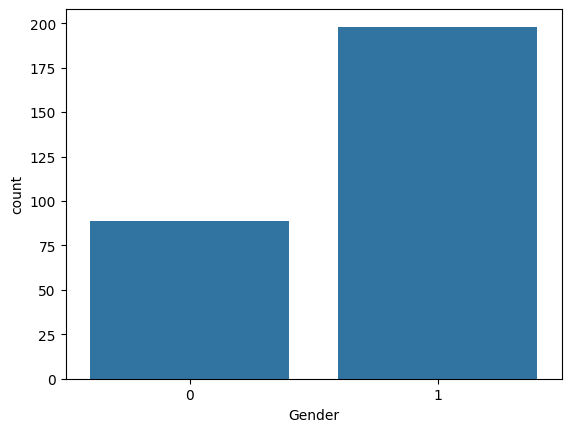

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'heart_cat' is your DataFrame
sns.countplot(data=heart_cat, x='Gender')
plt.show()

In [48]:
heart_cat['HeartAttackOutput'].dtype

dtype('int64')

In [49]:
heart_cat['HeartAttackOutput'] = heart_cat['HeartAttackOutput'].astype(str)

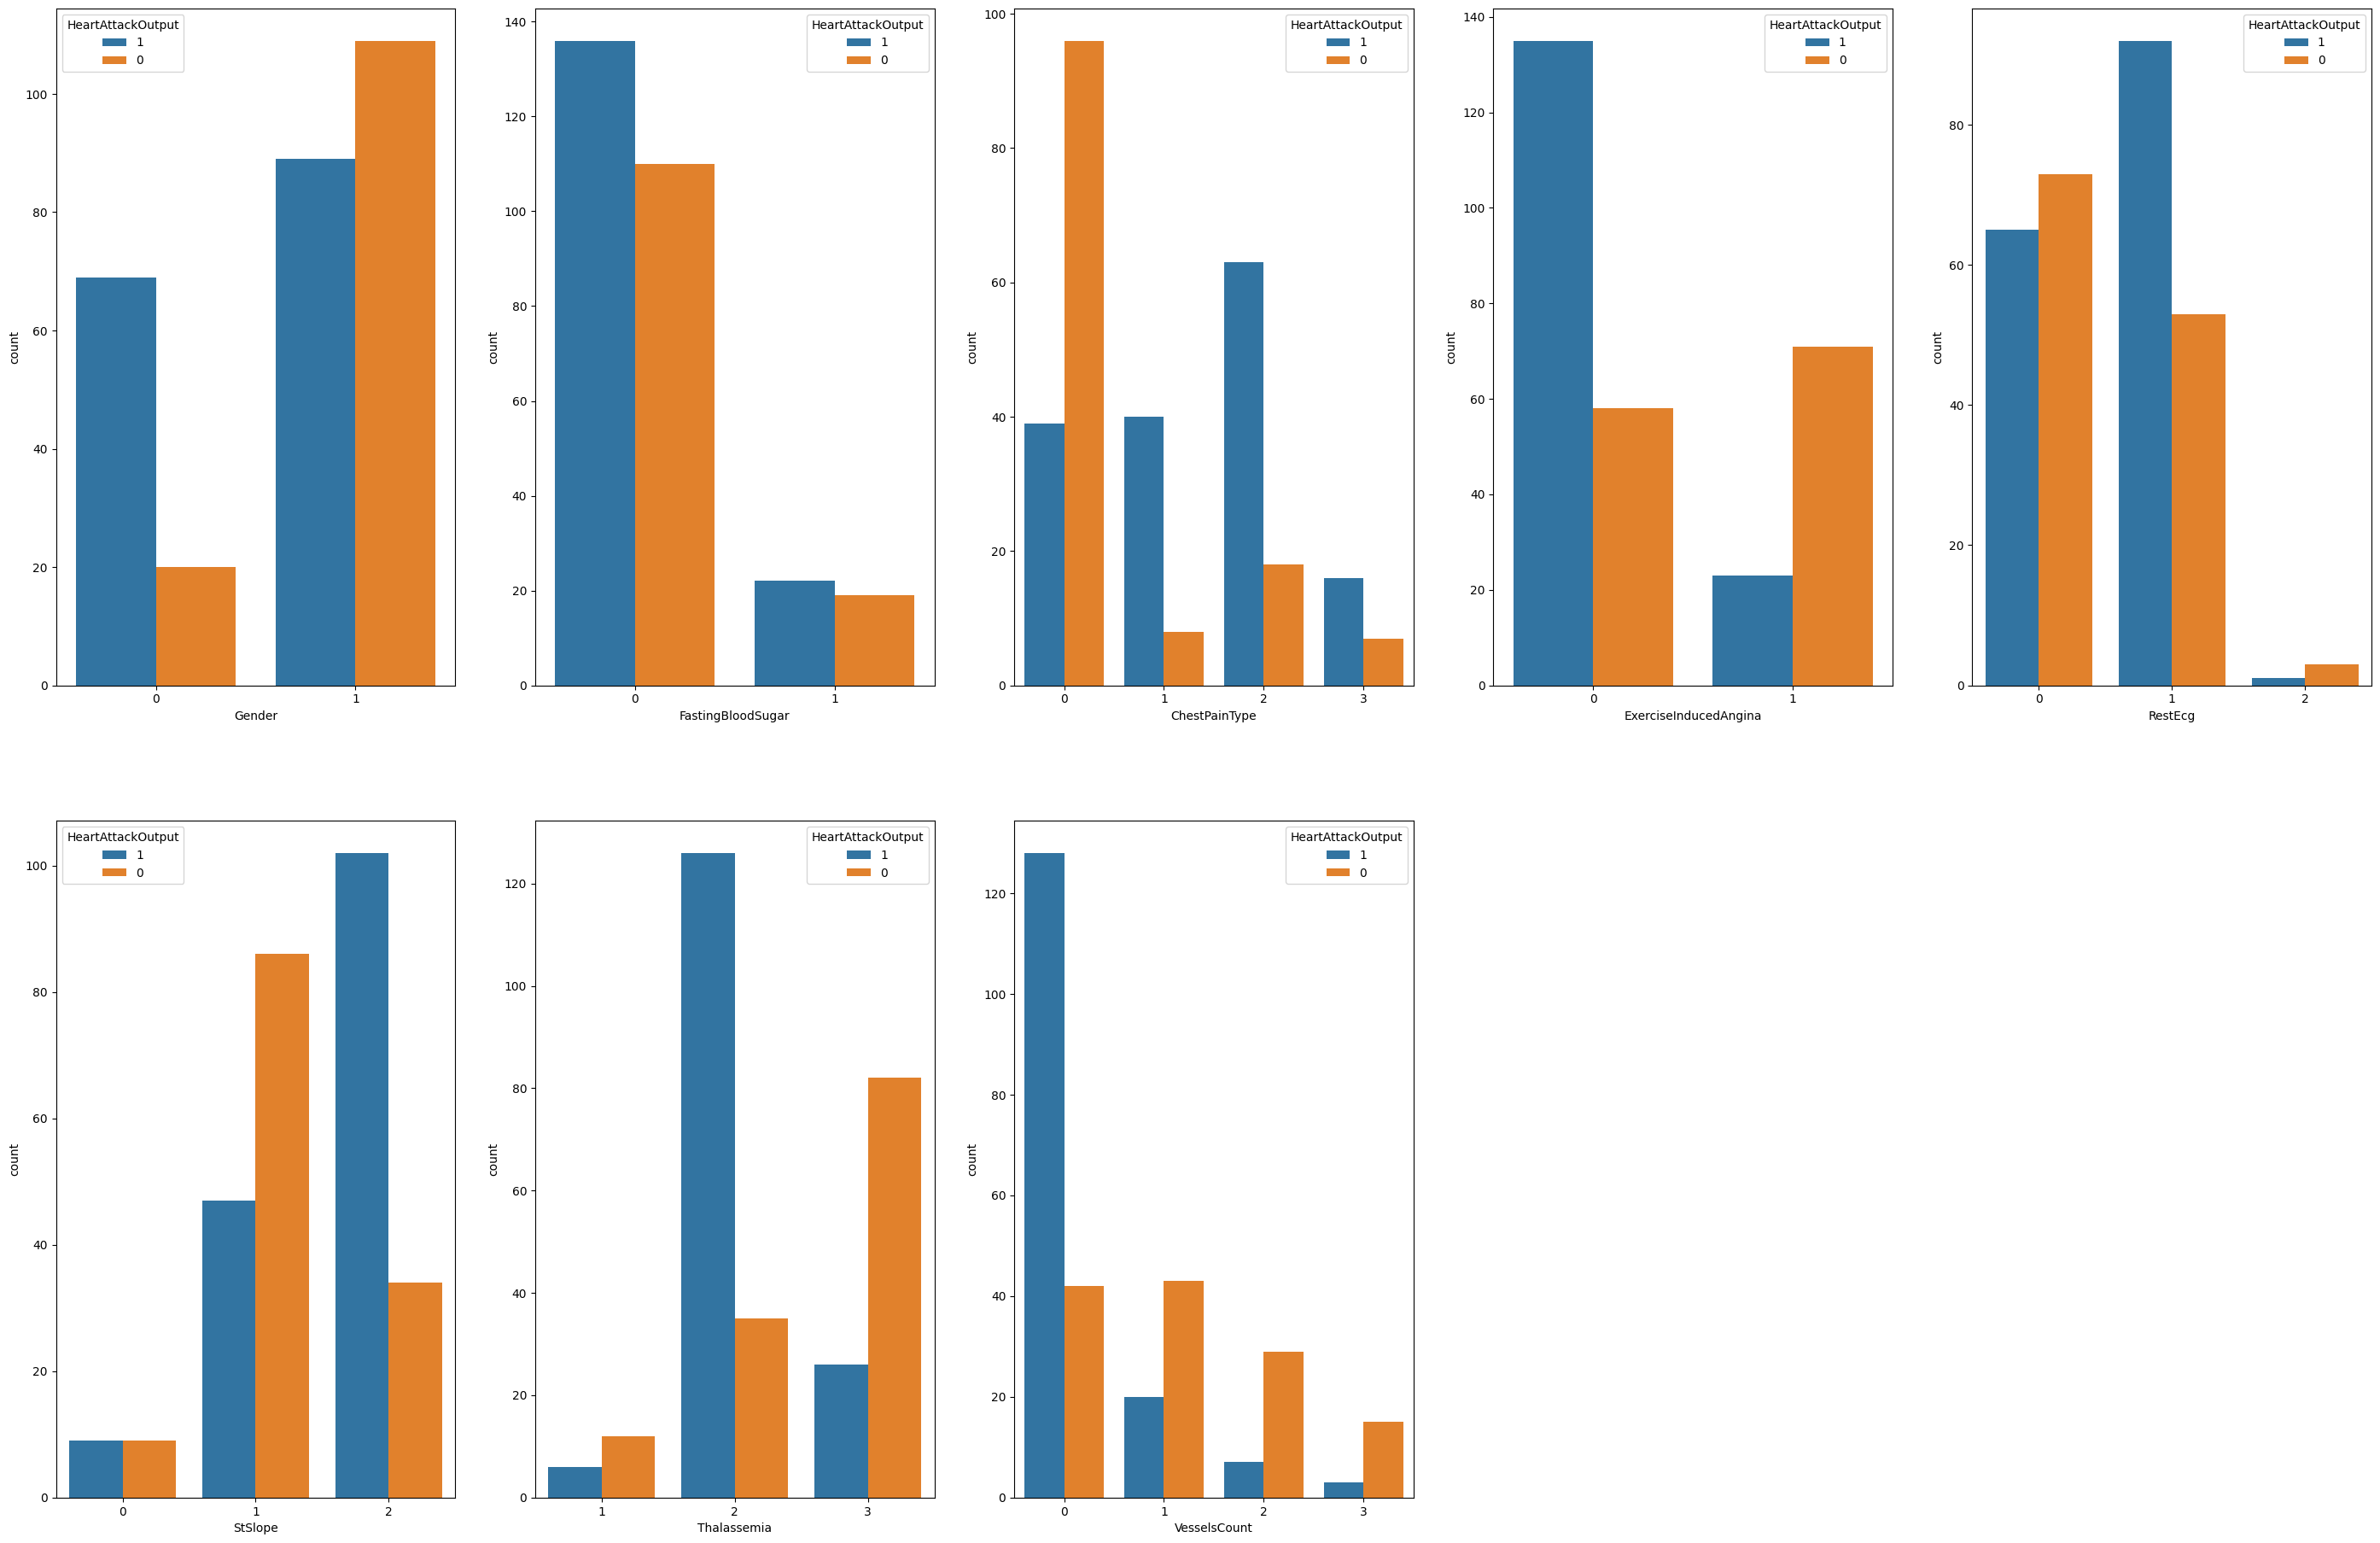

In [50]:
plt.figure(figsize=(35, 35))
# Create count plots for integer categories
for i, column in enumerate(['Gender', 'FastingBloodSugar', 'ChestPainType'], 1):
    plt.subplot(3, 5, i)
    sns.countplot(x=column, hue='HeartAttackOutput', data=heart_cat)

# Create count plots for object categories
for i, column in enumerate(['ExerciseInducedAngina', 'RestEcg', 'StSlope', 'Thalassemia', 'VesselsCount'], 4):
    plt.subplot(3, 5, i)
    sns.countplot(x=column, hue='HeartAttackOutput', data=heart_cat)

plt.show()

In [51]:
heart_cont=df_heart.select_dtypes(include=['float'])
heart_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 302
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OldPeak  287 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


In [52]:
heart_cont=df_heart.drop(cat_cols , axis=1)
heart_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    287 non-null    int64   
 1   Gender                 287 non-null    category
 2   ChestPainType          287 non-null    int64   
 3   RestingBloodPressure   287 non-null    int64   
 4   Cholesterol            287 non-null    int64   
 5   FastingBloodSugar      287 non-null    int64   
 6   RestEcg                287 non-null    int64   
 7   MaxHeartRate           287 non-null    int64   
 8   ExerciseInducedAngina  287 non-null    int64   
 9   OldPeak                287 non-null    float64 
 10  StSlope                287 non-null    int64   
 11  VesselsCount           287 non-null    int64   
 12  Thalassemia            287 non-null    int64   
 13  HeartAttackOutput      287 non-null    int64   
dtypes: category(1), float64(1), int64(12)
memory us

In [53]:
heart_cont.head()

Age Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
0   63      1              3                   145          233   
1   37      1              2                   130          250   
2   41      0              1                   130          204   
3   56      1              1                   120          236   
4   57      0              0                   120          354   

   FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
0                  1        0           150                      0      2.3   
1                  0        1           187                      0      3.5   
2                  0        0           172                      0      1.4   
3                  0        1           178                      0      0.8   
4                  0        1           163                      1      0.6   

   StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
0        0             0            1                  1  
1        0             0            2                  1  
2        2             0            2                  1  
3        2             0            2                  1  
4        2             0            2                  1

In [54]:
heart_cont.corr()

Age    Gender  ChestPainType  \
Age                    1.000000 -0.072391      -0.060168   
Gender                -0.072391  1.000000      -0.054418   
ChestPainType         -0.060168 -0.054418       1.000000   
RestingBloodPressure   0.304702 -0.039006       0.071251   
Cholesterol            0.177192 -0.141218      -0.098794   
FastingBloodSugar      0.133044  0.058432       0.116757   
RestEcg               -0.103736 -0.108164       0.040067   
MaxHeartRate          -0.400067 -0.053999       0.288385   
ExerciseInducedAngina  0.112509  0.146867      -0.382699   
OldPeak                0.193431  0.166430      -0.109039   
StSlope               -0.155421 -0.054768       0.079304   
VesselsCount           0.368764  0.135552      -0.214083   
Thalassemia            0.055830  0.244047      -0.152710   
HeartAttackOutput     -0.226750 -0.302926       0.408570   

                       RestingBloodPressure  Cholesterol  FastingBloodSugar  \
Age                                0.304702     0.177192           0.133044   
Gender                            -0.039006    -0.141218           0.058432   
ChestPainType                      0.071251    -0.098794           0.116757   
RestingBloodPressure               1.000000     0.143586           0.167890   
Cholesterol                        0.143586     1.000000          -0.005337   
FastingBloodSugar                  0.167890    -0.005337           1.000000   
RestEcg                           -0.090480    -0.101245          -0.073003   
MaxHeartRate                      -0.075059    -0.030874          -0.007962   
ExerciseInducedAngina              0.065089     0.085002          -0.009093   
OldPeak                            0.156988     0.032452           0.003692   
StSlope                           -0.103302     0.011007          -0.046927   
VesselsCount                       0.057947     0.113238           0.151021   
Thalassemia                        0.027382     0.049204          -0.014622   
HeartAttackOutput                 -0.119281    -0.099821          -0.011438   

                        RestEcg  MaxHeartRate  ExerciseInducedAngina  \
Age                   -0.103736     -0.400067               0.112509   
Gender                -0.108164     -0.053999               0.146867   
ChestPainType          0.040067      0.288385              -0.382699   
RestingBloodPressure  -0.090480     -0.075059               0.065089   
Cholesterol           -0.101245     -0.030874               0.085002   
FastingBloodSugar     -0.073003     -0.007962              -0.009093   
RestEcg                1.000000      0.054974              -0.072134   
MaxHeartRate           0.054974      1.000000              -0.392686   
ExerciseInducedAngina -0.072134     -0.392686               1.000000   
OldPeak               -0.038347     -0.353441               0.298277   
StSlope                0.088423      0.379395              -0.240616   
VesselsCount          -0.084350     -0.297154               0.153605   
Thalassemia            0.011584     -0.123956               0.222884   
HeartAttackOutput      0.130079      0.431519              -0.429082   

                        OldPeak   StSlope  VesselsCount  Thalassemia  \
Age                    0.193431 -0.155421      0.368764     0.055830   
Gender                 0.166430 -0.054768      0.135552     0.244047   
ChestPainType         -0.109039  0.079304     -0.214083    -0.152710   
RestingBloodPressure   0.156988 -0.103302      0.057947     0.027382   
Cholesterol            0.032452  0.011007      0.113238     0.049204   
FastingBloodSugar      0.003692 -0.046927      0.151021    -0.014622   
RestEcg               -0.038347  0.088423     -0.084350     0.011584   
MaxHeartRate          -0.353441  0.379395     -0.297154    -0.123956   
ExerciseInducedAngina  0.298277 -0.240616      0.153605     0.222884   
OldPeak                1.000000 -0.546473      0.260600     0.175196   
StSlope               -0.546473  1.000000     -0.085347    -0.068961

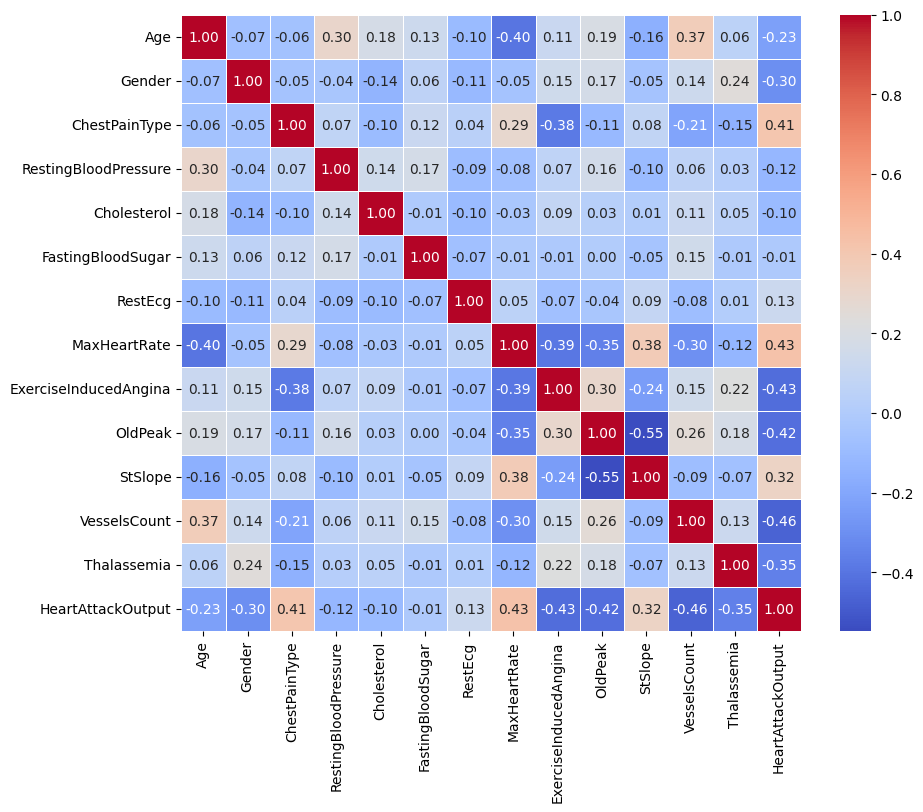

In [55]:
#calculate correlation matrix
correlation_matrix = heart_cont.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [56]:
heart_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    287 non-null    int64   
 1   Gender                 287 non-null    category
 2   ChestPainType          287 non-null    int64   
 3   RestingBloodPressure   287 non-null    int64   
 4   Cholesterol            287 non-null    int64   
 5   FastingBloodSugar      287 non-null    int64   
 6   RestEcg                287 non-null    int64   
 7   MaxHeartRate           287 non-null    int64   
 8   ExerciseInducedAngina  287 non-null    int64   
 9   OldPeak                287 non-null    float64 
 10  StSlope                287 non-null    int64   
 11  VesselsCount           287 non-null    int64   
 12  Thalassemia            287 non-null    int64   
 13  HeartAttackOutput      287 non-null    int64   
dtypes: category(1), float64(1), int64(12)
memory us

In [57]:
correlation_matrix = heart_cont.corr()

<Axes: >

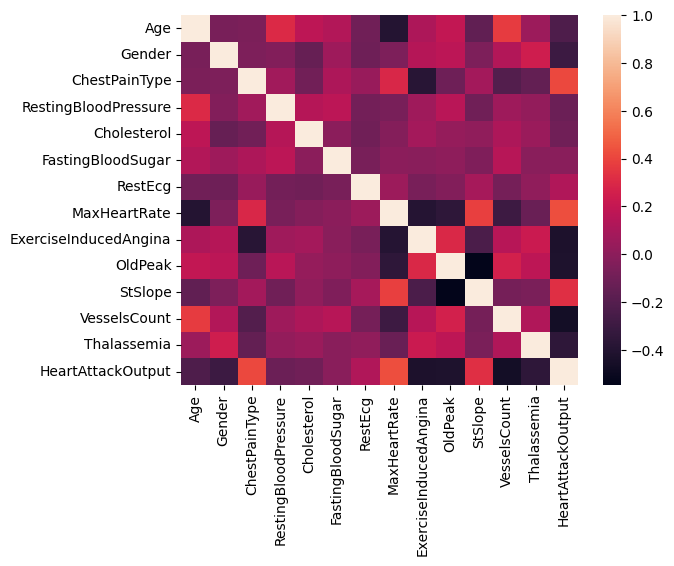

In [58]:
sns.heatmap(heart_cont.corr())

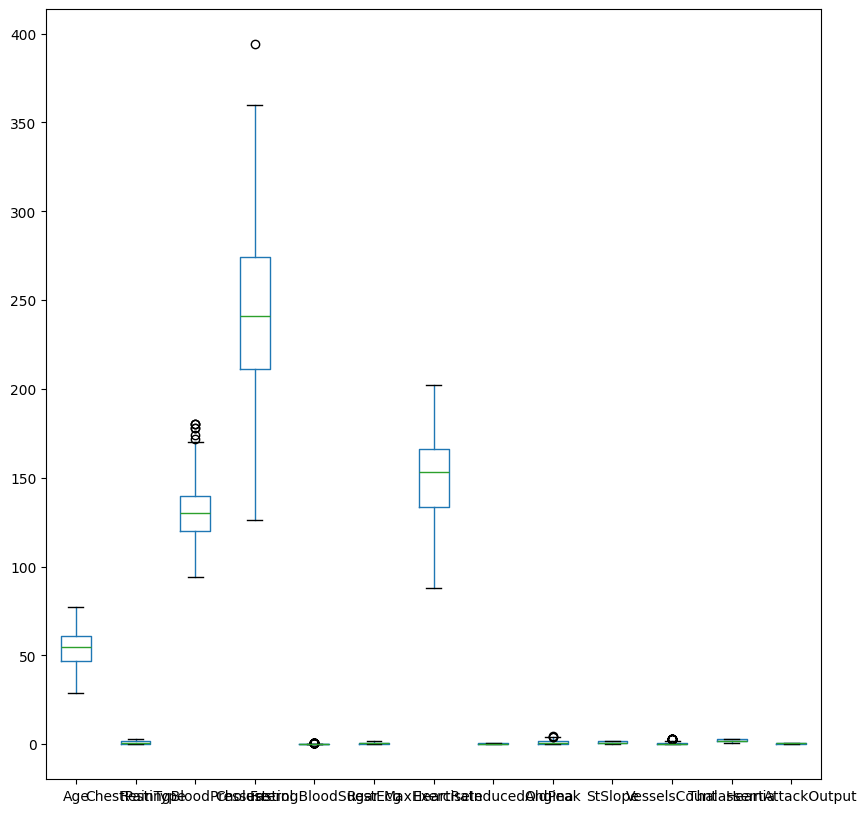

In [59]:
plt.figure(figsize=(10,10))
heart_cont.boxplot(grid=False)
plt.show()

<Figure size 1500x1500 with 0 Axes>

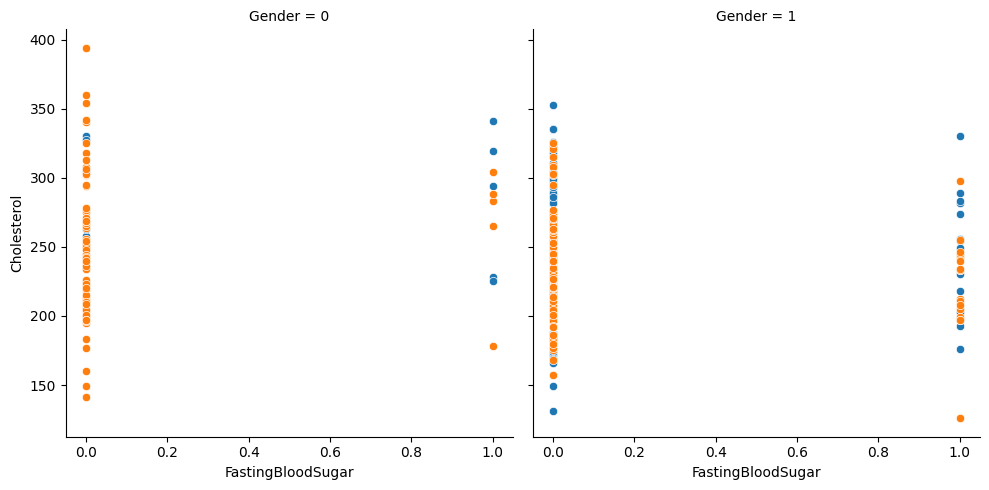

In [60]:
plt.figure(figsize=(15,15))
g = sns.FacetGrid(df_heart, hue='HeartAttackOutput', col='Gender', height=5)
g.map(sns.scatterplot, 'FastingBloodSugar', 'Cholesterol')
plt.show()

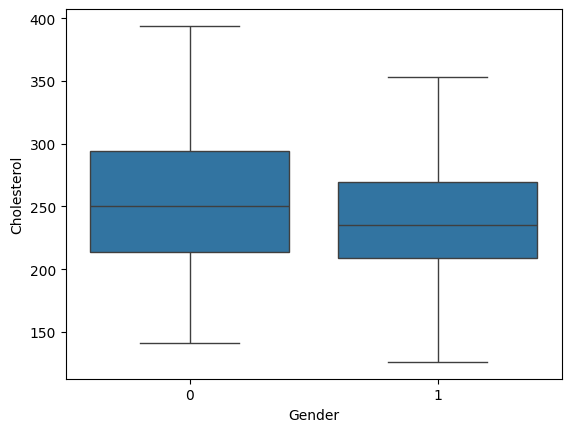

In [61]:
fig,ax=plt.subplots(figure=(15,10))
sns.boxplot(data=df_heart, x='Gender' , y='Cholesterol' , ax=ax)
plt.show()


In [62]:
categorical_columns = ['FastingBloodSugar', 'ExerciseInducedAngina', 'VesselsCount', 'HeartAttackOutput']
categorical_columns
numerical_columns

['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

In [63]:
df_heart.tail()

Age Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
298   57      0              0                   140          241   
299   45      1              3                   110          264   
300   68      1              0                   144          193   
301   57      1              0                   130          131   
302   57      0              1                   130          236   

     FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
298                  0        1           123                      1      0.2   
299                  0        1           132                      0      1.2   
300                  1        1           141                      0      3.4   
301                  0        1           115                      1      1.2   
302                  0        0           174                      0      0.0   

     StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
298        1             0            3                  0  
299        1             0            3                  0  
300        1             2            3                  0  
301        1             1            3                  0  
302        1             1            2                  0

In [64]:
numerical_columns = heart_cont.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Age', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestEcg', 'MaxHeartRate', 'ExerciseInducedAngina',
       'OldPeak', 'StSlope', 'VesselsCount', 'Thalassemia',
       'HeartAttackOutput'],
      dtype='object')

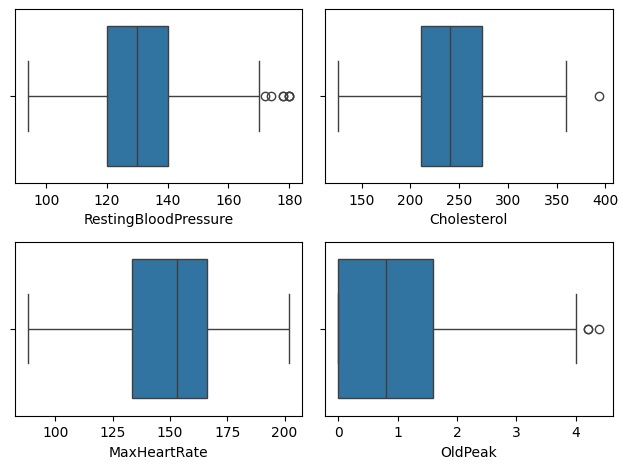

In [65]:
# Update the list of numerical columns
numerical_columns = ['RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

# Iterate through numerical columns and create boxplots
for i, numerical_column in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)  # Adjust subplot based on the number of numerical columns
    sns.boxplot(x=numerical_column, data=heart_cont)

plt.tight_layout()
plt.show()

In [66]:
df_heart['HeartAttackOutput'].value_counts(normalize=True)

HeartAttackOutput
1    0.550523
0    0.449477
Name: proportion, dtype: float64

<Axes: xlabel='HeartAttackOutput'>

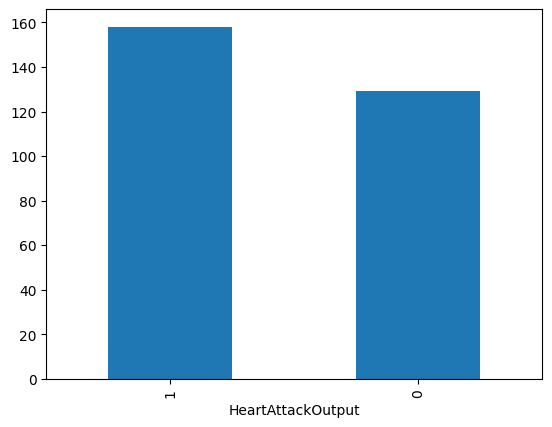

In [67]:
df_heart['HeartAttackOutput'].value_counts().plot(kind='bar')

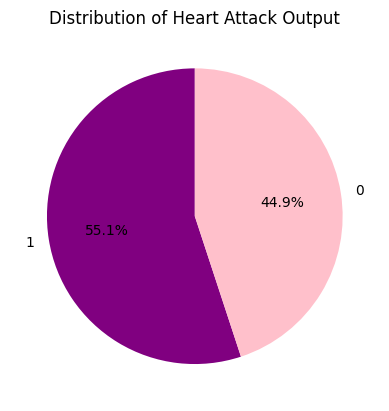

In [68]:
# Count values
value_counts = df_heart['HeartAttackOutput'].value_counts()

# Plot pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['purple', 'pink'], startangle=90)
plt.title('Distribution of Heart Attack Output')
plt.show()

In [69]:
df_heart.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestEcg', 'MaxHeartRate', 'ExerciseInducedAngina',
       'OldPeak', 'StSlope', 'VesselsCount', 'Thalassemia',
       'HeartAttackOutput'],
      dtype='object')

In [70]:
print(df_heart.dtypes)

Age                         int64
Gender                   category
ChestPainType               int64
RestingBloodPressure        int64
Cholesterol                 int64
FastingBloodSugar           int64
RestEcg                     int64
MaxHeartRate                int64
ExerciseInducedAngina       int64
OldPeak                   float64
StSlope                     int64
VesselsCount                int64
Thalassemia                 int64
HeartAttackOutput           int64
dtype: object


In [71]:
df_heart.head(10)

Age Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
0   63      1              3                   145          233   
1   37      1              2                   130          250   
2   41      0              1                   130          204   
3   56      1              1                   120          236   
4   57      0              0                   120          354   
5   57      1              0                   140          192   
6   56      0              1                   140          294   
7   44      1              1                   120          263   
8   52      1              2                   172          199   
9   57      1              2                   150          168   

   FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
0                  1        0           150                      0      2.3   
1                  0        1           187                      0      3.5   
2                  0        0           172                      0      1.4   
3                  0        1           178                      0      0.8   
4                  0        1           163                      1      0.6   
5                  0        1           148                      0      0.4   
6                  0        0           153                      0      1.3   
7                  0        1           173                      0      0.0   
8                  1        1           162                      0      0.5   
9                  0        1           174                      0      1.6   

   StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
0        0             0            1                  1  
1        0             0            2                  1  
2        2             0            2                  1  
3        2             0            2                  1  
4        2             0            2                  1  
5        1             0            1                  1  
6        1             0            2                  1  
7        2             0            3                  1  
8        2             0            3                  1  
9        2             0            2                  1

In [72]:
x=heart_cont
x.shape

(287, 14)

In [73]:
y=df_heart['HeartAttackOutput']
y.shape

(287,)

In [74]:
#SMOTE

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
os= SMOTE(random_state=0)

In [77]:
print(x.columns)

Index(['Age', 'Gender', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestEcg', 'MaxHeartRate', 'ExerciseInducedAngina',
       'OldPeak', 'StSlope', 'VesselsCount', 'Thalassemia',
       'HeartAttackOutput'],
      dtype='object')


In [78]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming x is your DataFrame with features, including a datetime column
# and y is your target variable

# Extracting numerical columns excluding the datetime column
numerical_columns = x.select_dtypes(include=['int64', 'float64']).columns

# Applying SMOTE to the numerical features only
os = SMOTE(random_state=0)
x_os, y_os = os.fit_resample(x[numerical_columns], y)

# Now, x_os contains resampled data with the datetime column handled appropriately

In [79]:
df_heart.tail()

Age Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
298   57      0              0                   140          241   
299   45      1              3                   110          264   
300   68      1              0                   144          193   
301   57      1              0                   130          131   
302   57      0              1                   130          236   

     FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
298                  0        1           123                      1      0.2   
299                  0        1           132                      0      1.2   
300                  1        1           141                      0      3.4   
301                  0        1           115                      1      1.2   
302                  0        0           174                      0      0.0   

     StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
298        1             0            3                  0  
299        1             0            3                  0  
300        1             2            3                  0  
301        1             1            3                  0  
302        1             1            2                  0

In [80]:
x_os.shape,y_os.shape

((316, 13), (316,))

In [81]:
y_os.value_counts(normalize=True)

HeartAttackOutput
1    0.5
0    0.5
Name: proportion, dtype: float64

In [82]:
df_os=pd.DataFrame(x_os)
df_os['HeartAttackOutput']=y_os

<function matplotlib.pyplot.show(close=None, block=None)>

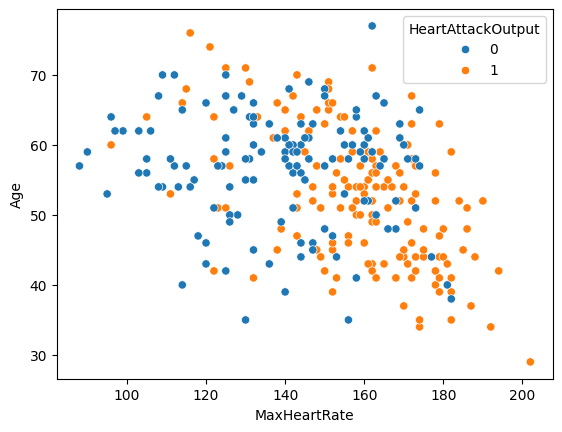

In [83]:
sns.scatterplot(data=df_heart, x='MaxHeartRate' , y='Age', hue='HeartAttackOutput')
plt.show

In [84]:
df_heart.tail()

Age Gender  ChestPainType  RestingBloodPressure  Cholesterol  \
298   57      0              0                   140          241   
299   45      1              3                   110          264   
300   68      1              0                   144          193   
301   57      1              0                   130          131   
302   57      0              1                   130          236   

     FastingBloodSugar  RestEcg  MaxHeartRate  ExerciseInducedAngina  OldPeak  \
298                  0        1           123                      1      0.2   
299                  0        1           132                      0      1.2   
300                  1        1           141                      0      3.4   
301                  0        1           115                      1      1.2   
302                  0        0           174                      0      0.0   

     StSlope  VesselsCount  Thalassemia  HeartAttackOutput  
298        1             0            3                  0  
299        1             0            3                  0  
300        1             2            3                  0  
301        1             1            3                  0  
302        1             1            2                  0

In [85]:
#2nd split(trail and test)

In [86]:
from sklearn.model_selection import train_test_split
# Assuming x_os and y_os are your feature and target variables
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.2, random_state=0)

In [87]:
#scaling_the_value

In [88]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train is your training data with the numeric 'Age' column

# Create a new StandardScaler instance
sc_train = StandardScaler()

# Fit the StandardScaler on the training data
sc_train.fit(x_train)

# Applying standard scaling transformation to x_train
x_train_sc_numeric = sc_train.transform(x_train)

# Creating a DataFrame with the scaled numerical features
x_train_sc_df = pd.DataFrame(x_train_sc_numeric, columns=x_train.columns)

# Now, x_train_sc_df contains the scaled numerical features, including the 'Age' column
print(x_train_sc_df.head(15))

         Age  ChestPainType  RestingBloodPressure  Cholesterol  \
0   0.243202      -0.896866              0.518922    -1.200520   
1  -0.430280       2.038332             -0.376752    -0.733754   
2   1.477918      -0.896866              0.757768    -1.178293   
3  -0.991514       1.059932              0.638345    -1.533924   
4  -1.777243       1.059932             -2.227811    -1.044931   
5   1.028930       1.059932              0.518922     1.488941   
6  -1.328255      -0.896866             -0.675310    -1.556151   
7  -1.216008       1.059932              0.518922    -0.244761   
8  -0.879268       1.059932             -0.078194     0.155324   
9   1.477918       1.059932             -0.675310    -0.778208   
10 -0.879268      -0.896866             -1.153002    -0.933796   
11  1.028930      -0.896866             -0.197617     0.377594   
12  0.579942       1.059932             -0.675310    -1.511697   
13  0.804436      -0.896866             -0.675310     0.466501   
14 -1.1037

In [89]:
#training_model

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Assuming you have your data loaded into df_heart (replace it with your actual DataFrame)
# Also, assuming 'HeartAttackOutput' is your target variable
# Extracting features (X) and target variable (y)
X = df_heart.drop('HeartAttackOutput', axis=1)
y = df_heart['HeartAttackOutput']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create transformers for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Use most frequent value for imputation
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with the preprocessor and the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = model_pipeline.predict(X_test)

In [91]:
from sklearn.model_selection import train_test_split

# Assuming X is your features DataFrame and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='liblinear')

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is the target variable

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # You can use different strategies for imputation
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can use different strategies for imputation
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the pipeline with preprocessing and the logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(solver='liblinear'))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestEcg', 'MaxHeartRate', 'ExerciseInducedAngina',
       'OldPeak', 'StSlope', 'VesselsCount', 'Thalassemia'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [94]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8448275862068966
Confusion Matrix:
[[18  5]
 [ 4 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.86      0.89      0.87        35

    accuracy                           0.84        58
   macro avg       0.84      0.83      0.84        58
weighted avg       0.84      0.84      0.84        58



In [95]:
from sklearn.impute import SimpleImputer

# Assuming df_heart is your original DataFrame
numerical_columns = df_heart.select_dtypes(include=['int64', 'float64']).columns

# Extracting numerical columns excluding the target variable
X_train = df_heart[numerical_columns[:-1]]  # Exclude the last column (target variable)
y_train = df_heart['HeartAttackOutput']  # Target variable

# Creating a SimpleImputer instance
imputer = SimpleImputer(strategy='mean')

# Applying imputation to both features and target variable
X_train_imputed = imputer.fit_transform(X_train)
y_train_imputed = y_train  # No need to impute the target variable

# Now X_train_imputed and y_train_imputed should have consistent numbers of samples
model_lr.fit(X_train_imputed, y_train_imputed)

LogisticRegression(solver='liblinear')

In [96]:
# Assuming you have already fitted the model
results = model_lr.score(X_train_imputed, y_train_imputed)

# Print the accuracy
print(f'Accuracy on the training set: {results * 100:.2f}%')

Accuracy on the training set: 86.06%


In [97]:
#model oprimizing

In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [99]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_heart['HeartAttackOutput'] = label_encoder.fit_transform(df_heart['HeartAttackOutput'])

In [100]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    287 non-null    int64   
 1   Gender                 287 non-null    category
 2   ChestPainType          287 non-null    int64   
 3   RestingBloodPressure   287 non-null    int64   
 4   Cholesterol            287 non-null    int64   
 5   FastingBloodSugar      287 non-null    int64   
 6   RestEcg                287 non-null    int64   
 7   MaxHeartRate           287 non-null    int64   
 8   ExerciseInducedAngina  287 non-null    int64   
 9   OldPeak                287 non-null    float64 
 10  StSlope                287 non-null    int64   
 11  VesselsCount           287 non-null    int64   
 12  Thalassemia            287 non-null    int64   
 13  HeartAttackOutput      287 non-null    int64   
dtypes: category(1), float64(1), int64(12)
memory us

In [101]:
categorical_columns = df_heart.select_dtypes(include='category').columns
categorical_columns

Index(['Gender'], dtype='object')

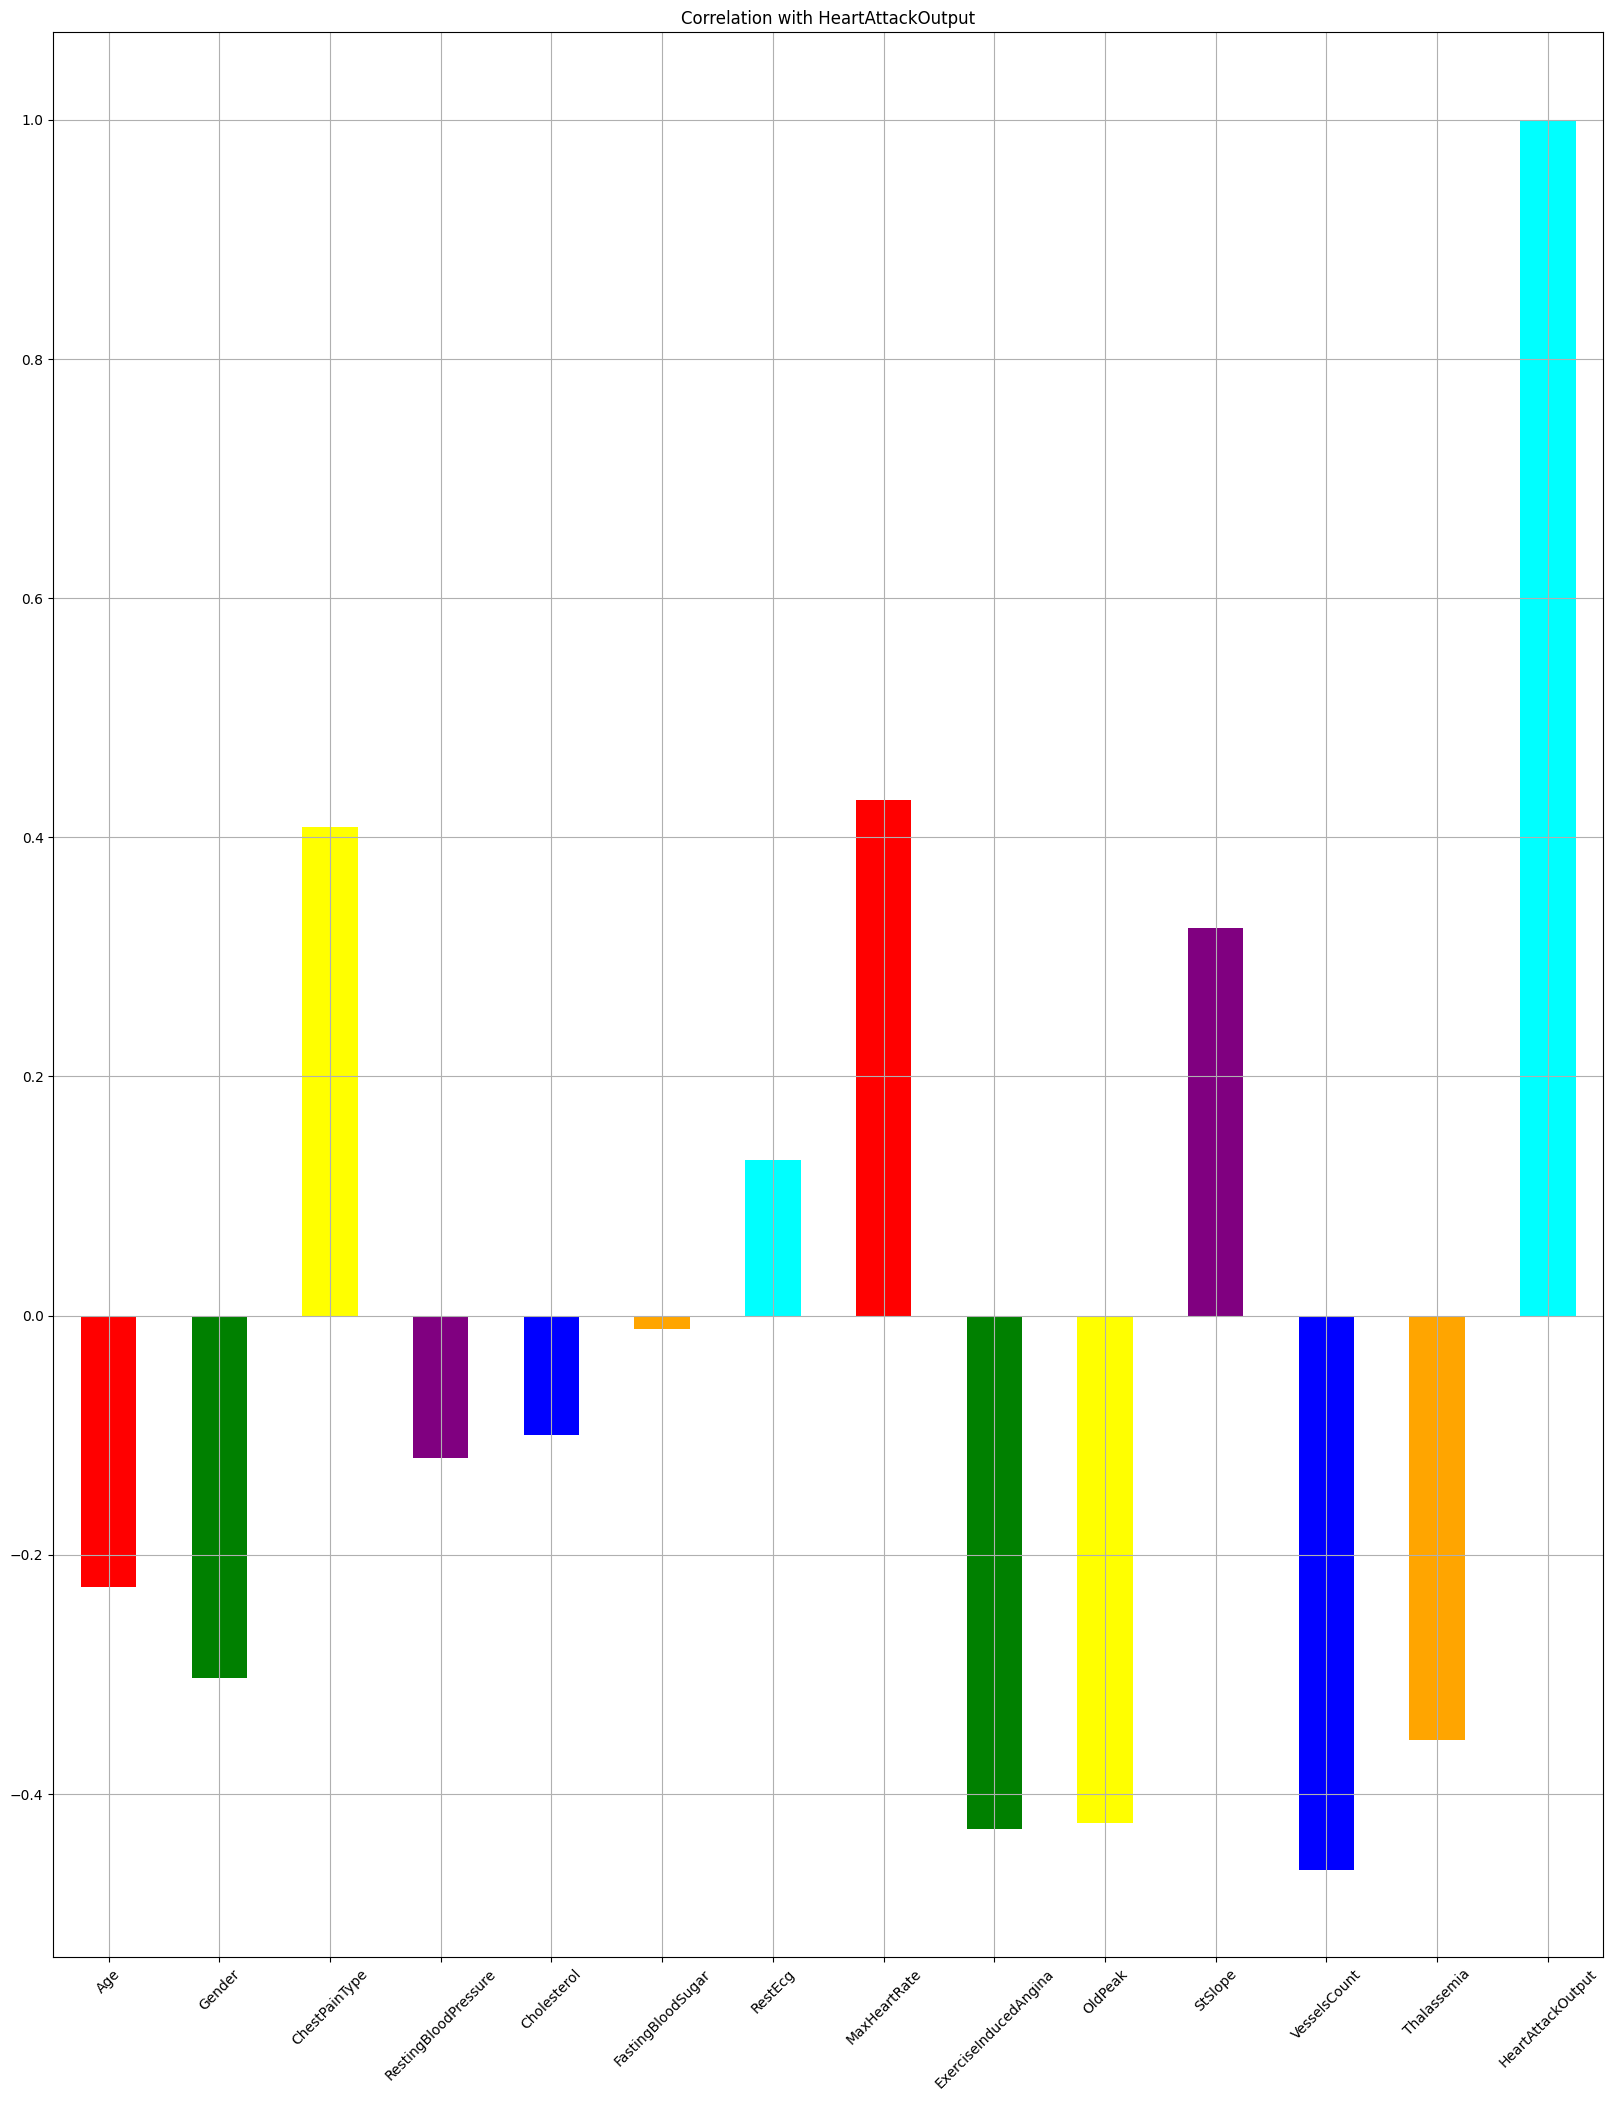

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_columns = df_heart.select_dtypes(include='object').columns

# Handle string categories with LabelEncoder
label_encoder = LabelEncoder()
df_heart_encoded = df_heart.copy()

for column in categorical_columns:
    df_heart_encoded[column] = label_encoder.fit_transform(df_heart[column])

# Calculate correlation and plot
c = ['red', 'green', 'yellow', 'purple', 'blue', 'orange', 'cyan']
df_heart_encoded.corr()['HeartAttackOutput'].plot.bar(
    figsize=(20,25),
    title='Correlation with HeartAttackOutput',
    fontsize=10,
    rot=45,
    grid=True,
    color=c
)

plt.show()

In [103]:
heart_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    287 non-null    int64   
 1   Gender                 287 non-null    category
 2   ChestPainType          287 non-null    int64   
 3   RestingBloodPressure   287 non-null    int64   
 4   Cholesterol            287 non-null    int64   
 5   FastingBloodSugar      287 non-null    int64   
 6   RestEcg                287 non-null    int64   
 7   MaxHeartRate           287 non-null    int64   
 8   ExerciseInducedAngina  287 non-null    int64   
 9   OldPeak                287 non-null    float64 
 10  StSlope                287 non-null    int64   
 11  VesselsCount           287 non-null    int64   
 12  Thalassemia            287 non-null    int64   
 13  HeartAttackOutput      287 non-null    int64   
dtypes: category(1), float64(1), int64(12)
memory us

In [104]:
X1 = heart_cont  # Assuming 'HeartAttackOutput' is the target variable
Y1 = df_heart['HeartAttackOutput']

In [105]:
X1.shape

(287, 14)

In [106]:
Y1.shape

(287,)

In [107]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming heart_cont is your DataFrame
X = heart_cont.drop('HeartAttackOutput', axis=1)
y = heart_cont['HeartAttackOutput']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now you can use X_resampled and y_resampled for training your model
# and X_test, y_test for testing

In [108]:
#use train data to train data
lr_1 = LogisticRegression(solver='liblinear')

In [109]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'HeartAttackOutput' is a categorical column
label_encoder = LabelEncoder()
df_heart['HeartAttackOutput'] = label_encoder.fit_transform(df_heart['HeartAttackOutput'])
Y1 = df_heart['HeartAttackOutput']

In [110]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns

# One-hot encode categorical columns for training set
encoder = OneHotEncoder(drop='first')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]).toarray())
X_train_encoded.columns = encoder.get_feature_names_out(categorical_columns)

# Drop original categorical columns from X_train
X_train = X_train.drop(categorical_columns, axis=1)

# Concatenate one-hot encoded features with remaining features
X_train = pd.concat([X_train, X_train_encoded], axis=1)

In [111]:
numeric_imputer = SimpleImputer(strategy='mean')
X_resampled_imputed = numeric_imputer.fit_transform(X_resampled)
X_test_imputed = numeric_imputer.transform(X_test)

# Step 2: Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_resampled_imputed, y_resampled)

# Step 3: Make predictions on the testing data

LogisticRegression(random_state=42)

In [112]:
y_pred = model.predict(X_test_imputed)

# Step 4: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.86      0.86      0.86        35

    accuracy                           0.83        58
   macro avg       0.82      0.82      0.82        58
weighted avg       0.83      0.83      0.83        58

Confusion Matrix:
[[18  5]
 [ 5 30]]


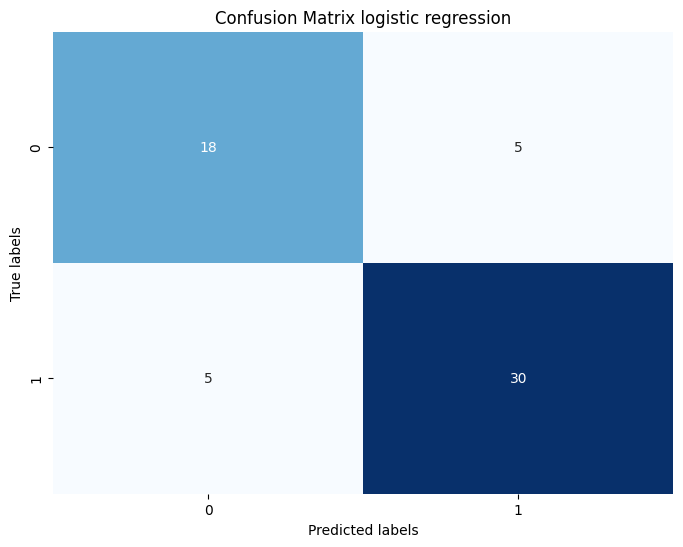

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix logistic regression')
plt.show()

In [114]:
from imblearn.over_sampling import SMOTE

# Assuming X_resampled_imputed, y_resampled are already defined

# Step 5: Oversample the training data using SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_resampled_imputed, y_resampled)

# Now you can train your Logistic Regression model on the oversampled data
model.fit(X_resampled_smote, y_resampled_smote)

# Make predictions on the testing data
y_pred_smote = model.predict(X_test_imputed)

# Evaluate model performance after oversampling
print("Classification Report after SMOTE:")
print(classification_report(y_test, y_pred_smote))

print("Confusion Matrix after SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.86      0.86      0.86        35

    accuracy                           0.83        58
   macro avg       0.82      0.82      0.82        58
weighted avg       0.83      0.83      0.83        58

Confusion Matrix after SMOTE:
[[18  5]
 [ 5 30]]


In [115]:
from sklearn.metrics import accuracy_score

# Step 7: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8275862068965517


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Impute missing values
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns

numeric_imputer = SimpleImputer(strategy='mean')
X_train[numeric_columns] = numeric_imputer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = numeric_imputer.transform(X_test[numeric_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_columns] = categorical_imputer.fit_transform(X_train[categorical_columns])
X_test[categorical_columns] = categorical_imputer.transform(X_test[categorical_columns])

label_encoder = LabelEncoder()
for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Step 3: Oversample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Train the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 6: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.86      0.89      0.87        35

    accuracy                           0.84        58
   macro avg       0.84      0.83      0.84        58
weighted avg       0.84      0.84      0.84        58

Confusion Matrix:
[[18  5]
 [ 4 31]]


In [117]:
#CROSS_VALIDATION

In [118]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming X_train and Y_train are your training data and labels
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Assuming you have imputed and encoded your data

# Scale the features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

# Initialize and fit the logistic regression model
lr = LogisticRegression()
lr.fit(X_train_sc, Y_train)

# Cross-validation
cv_scores = cross_val_score(lr, X_train_sc, Y_train, cv=3)  # Adjust the number of folds as needed

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1.]
Mean CV Score: 1.0


In [120]:
print("Shape of X_train_sc:", X_train_sc.shape)
print("Shape of Y_train:", Y_train.shape)

Shape of X_train_sc: (229, 14)
Shape of Y_train: (229,)


In [121]:
from sklearn.model_selection import cross_val_score

# Assuming X_train_sc is the scaled feature matrix and Y_train is your target variable
# Assuming lr_1 is your Logistic Regression model

# Perform 10-fold cross-validation
cv_scores = cross_val_score(lr_1, X_train_sc, Y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Print the average accuracy
print("\nAverage Accuracy:", cv_scores.mean())


Cross-Validation Scores:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Average Accuracy: 1.0


In [122]:
#generate intance of KFold and the logistic regression algorithm
kfold=KFold(n_splits=10 , random_state= 7 , shuffle=True)
Ir_2=LogisticRegression(solver='liblinear')

In [123]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create an instance of KFold with 10 splits
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Create an instance of Logistic Regression
lr_2 = LogisticRegression(solver='liblinear')

# Use cross_val_score to perform k-fold cross-validation
results = cross_val_score(lr_2, X1, Y1, cv=kfold, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy results
mean_accuracy = results.mean() * 100.0
std_accuracy = results.std() * 100.0

print("Average Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Average Accuracy: 100.0
Standard Deviation of Accuracy: 0.0


In [124]:
from sklearn.model_selection import cross_val_score

# Assuming 'model' is your classifier and 'X' and 'Y' are your data
results = cross_val_score(model, X1, Y1, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy results
mean_accuracy = results.mean() * 100.0
std_accuracy = results.std() * 100.0

print("Average Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Average Accuracy: 100.0
Standard Deviation of Accuracy: 0.0


In [125]:
#logical regression and CV with 'long_loss' matrics
kfold=KFold(n_splits=10 , random_state= 7 , shuffle=True)
Ir_3=LogisticRegression(solver='liblinear')
results=cross_val_score(Ir_3,X_train_sc, Y_train, cv=kfold, scoring='neg_log_loss') #average negative log loss
results.mean()*100.0, results.std()*100.0

(-1.9964582665065893, 0.5808184512825282)

In [126]:
### Dummies using pandas to convert categorical value to one-hot encoding

In [127]:
df_heart = pd.get_dummies(df_heart)

In [128]:
#logical regression with AUC metric
kfold=KFold(n_splits=10 , random_state= 7 , shuffle=True)
Ir_4=LogisticRegression(solver='liblinear')
results=cross_val_score(Ir_4,X_train_sc, Y_train, cv=kfold, scoring='roc_auc') #average negative log loss
results.mean()*100.0, results.std()*100.0
print("AUC: %.3f (%.3f) " % (results.mean() , results.std()))

AUC: 1.000 (0.000) 


In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [130]:
# Create an instance of Logistic Regression
Ir_2 = LogisticRegression(solver='liblinear')

# Fit the model to your training data
Ir_2.fit(X_train_sc, Y_train)

LogisticRegression(solver='liblinear')

In [131]:

X_test_without_target = X_test.drop('HeartAttackOutput', axis=1, errors='ignore')

# Predictions on the test set
y_pred = model.predict(X_test_without_target)

# Convert predicted labels to binary integers if needed
# (This step may not be necessary, depending on your context)
y_pred_binary = y_pred

# Check the structure and data types
print("Actual Labels (y_test) structure and data types:")
print(y_test.head())  # Display the first few rows of y_test
print(y_test.dtypes)  # Display the data types of y_test

print("\nPredicted Labels (y_pred_binary) structure and data types:")
print(y_pred_binary[:5])  # Display the first few elements of y_pred_binary
print(type(y_pred_binary[0]))  # Display the data type of elements in y_pred_binary

Actual Labels (y_test) structure and data types:
9      1
269    0
148    1
224    0
241    0
Name: HeartAttackOutput, dtype: int64
int64

Predicted Labels (y_pred_binary) structure and data types:
[1 0 1 0 1]
<class 'numpy.int64'>


In [132]:
print("Unique classes in Y_test:", np.unique(Y_test))
print("Unique classes in y_pred:", np.unique(y_pred))

Unique classes in Y_test: [0 1]
Unique classes in y_pred: [0 1]


In [133]:
print("Actual class labels in Y_test:", Y_test)
print("Predicted class labels in y_pred:", y_pred)

Actual class labels in Y_test: 9      1
269    0
148    1
224    0
241    0
205    0
101    1
75     1
113    1
34     1
143    1
216    0
147    1
282    0
5      1
234    0
249    0
268    0
46     1
285    0
250    0
58     1
159    1
160    1
117    1
112    1
156    1
150    1
115    1
43     1
116    1
151    1
180    0
222    0
47     1
84     1
65     1
122    1
77     1
172    0
152    1
31     1
22     1
24     1
191    0
267    0
87     1
183    0
284    0
97     1
214    0
179    0
185    0
171    0
6      1
79     1
201    0
62     1
Name: HeartAttackOutput, dtype: int64
Predicted class labels in y_pred: [1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1]


In [134]:
label_encoder = LabelEncoder()
y_true_int = label_encoder.fit_transform(Y_test)
y_pred_int = label_encoder.transform(y_pred)

print("Class mapping by LabelEncoder:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Class mapping by LabelEncoder: {0: 0, 1: 1}


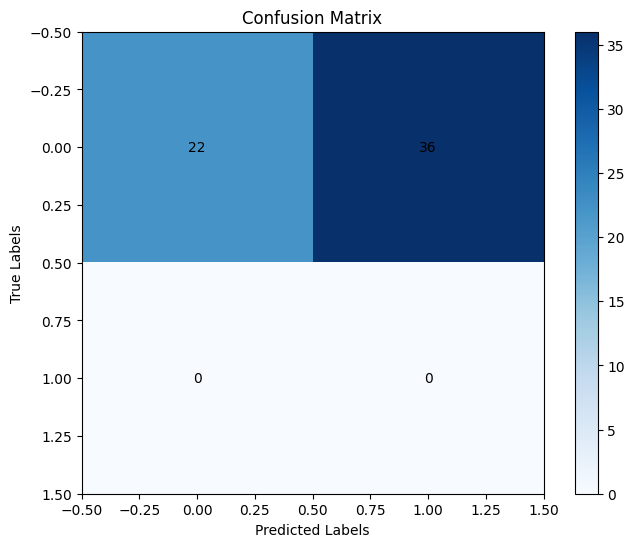

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert string labels in y_true to integers
y_true_int = np.where(Y_test == 'heart attack', 1, 0)

# Confusion matrix
matrix = confusion_matrix(y_true_int, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(matrix, cmap='Blues', interpolation='nearest')

# Add annotations
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        plt.text(j, i, str(matrix[i][j]), ha='center', va='center', color='black')

# Add color bar
plt.colorbar()

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

In [136]:
# Find instances where Y_test and y_pred differ
discrepancies = Y_test[Y_test != y_pred]
print(discrepancies)

241    0
101    1
34     1
282    0
222    0
172    0
31     1
97     1
171    0
Name: HeartAttackOutput, dtype: int64


In [137]:
print("Actual class distribution in Y_test:")
print(Y_test.value_counts())

print("\nPredicted class distribution in y_pred:")
print(pd.Series(y_pred).value_counts())

Actual class distribution in Y_test:
HeartAttackOutput
1    35
0    23
Name: count, dtype: int64

Predicted class distribution in y_pred:
1    36
0    22
Name: count, dtype: int64


In [138]:
# Count occurrences for each category
true_positive = np.sum((Y_test == 'heart attack') & (y_pred == 'heart attack'))
true_negative = np.sum((Y_test == 'no heart attack') & (y_pred == 'no heart attack'))
false_positive = np.sum((Y_test == 'no heart attack') & (y_pred == 'heart attack'))
false_negative = np.sum((Y_test == 'heart attack') & (y_pred == 'no heart attack'))

print("True Positive:", true_positive)
print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)

True Positive: 0
True Negative: 0
False Positive: 0
False Negative: 0


In [139]:
#classification report
y_true_int = np.where(y_test == 'heart attack', 1, 0)
report=classification_report(y_true_int, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        58
           1       0.00      0.00      0.00         0

    accuracy                           0.38        58
   macro avg       0.50      0.19      0.28        58
weighted avg       1.00      0.38      0.55        58



In [140]:
#list of features
features= list(heart_cont.columns)
features

['Age',
 'Gender',
 'ChestPainType',
 'RestingBloodPressure',
 'Cholesterol',
 'FastingBloodSugar',
 'RestEcg',
 'MaxHeartRate',
 'ExerciseInducedAngina',
 'OldPeak',
 'StSlope',
 'VesselsCount',
 'Thalassemia',
 'HeartAttackOutput']

In [141]:
#list of coefficent 
coefficients=Ir_2.coef_
coefficients

array([[-0.03467736, -0.29812858,  0.31770787, -0.13878637, -0.0486175 ,
         0.0819244 ,  0.13472198,  0.20629701, -0.19080563, -0.27726758,
         0.11321187, -0.37865959, -0.29538237,  3.58629267]])

In [142]:
#list of coefficent  from model
coefficients=coefficients.ravel().tolist()
coefficients

[-0.03467735770905575,
 -0.29812857632159917,
 0.31770787261622846,
 -0.13878636921242235,
 -0.048617502186813884,
 0.0819244035174229,
 0.1347219815657675,
 0.20629700531148415,
 -0.19080562841441687,
 -0.2772675779494439,
 0.11321187177463675,
 -0.37865958860686316,
 -0.2953823692946512,
 3.586292674163151]

In [143]:
import pandas as pd

# Assuming you already have 'features' and 'coefficients' lists
data = {'features': features, 'coefficients': coefficients}
coeff_table = pd.DataFrame(data)
coeff_table = coeff_table.sort_values(by='coefficients')
coeff_table

features  coefficients
11           VesselsCount     -0.378660
1                  Gender     -0.298129
12            Thalassemia     -0.295382
9                 OldPeak     -0.277268
8   ExerciseInducedAngina     -0.190806
3    RestingBloodPressure     -0.138786
4             Cholesterol     -0.048618
0                     Age     -0.034677
5       FastingBloodSugar      0.081924
10                StSlope      0.113212
6                 RestEcg      0.134722
7            MaxHeartRate      0.206297
2           ChestPainType      0.317708
13      HeartAttackOutput      3.586293

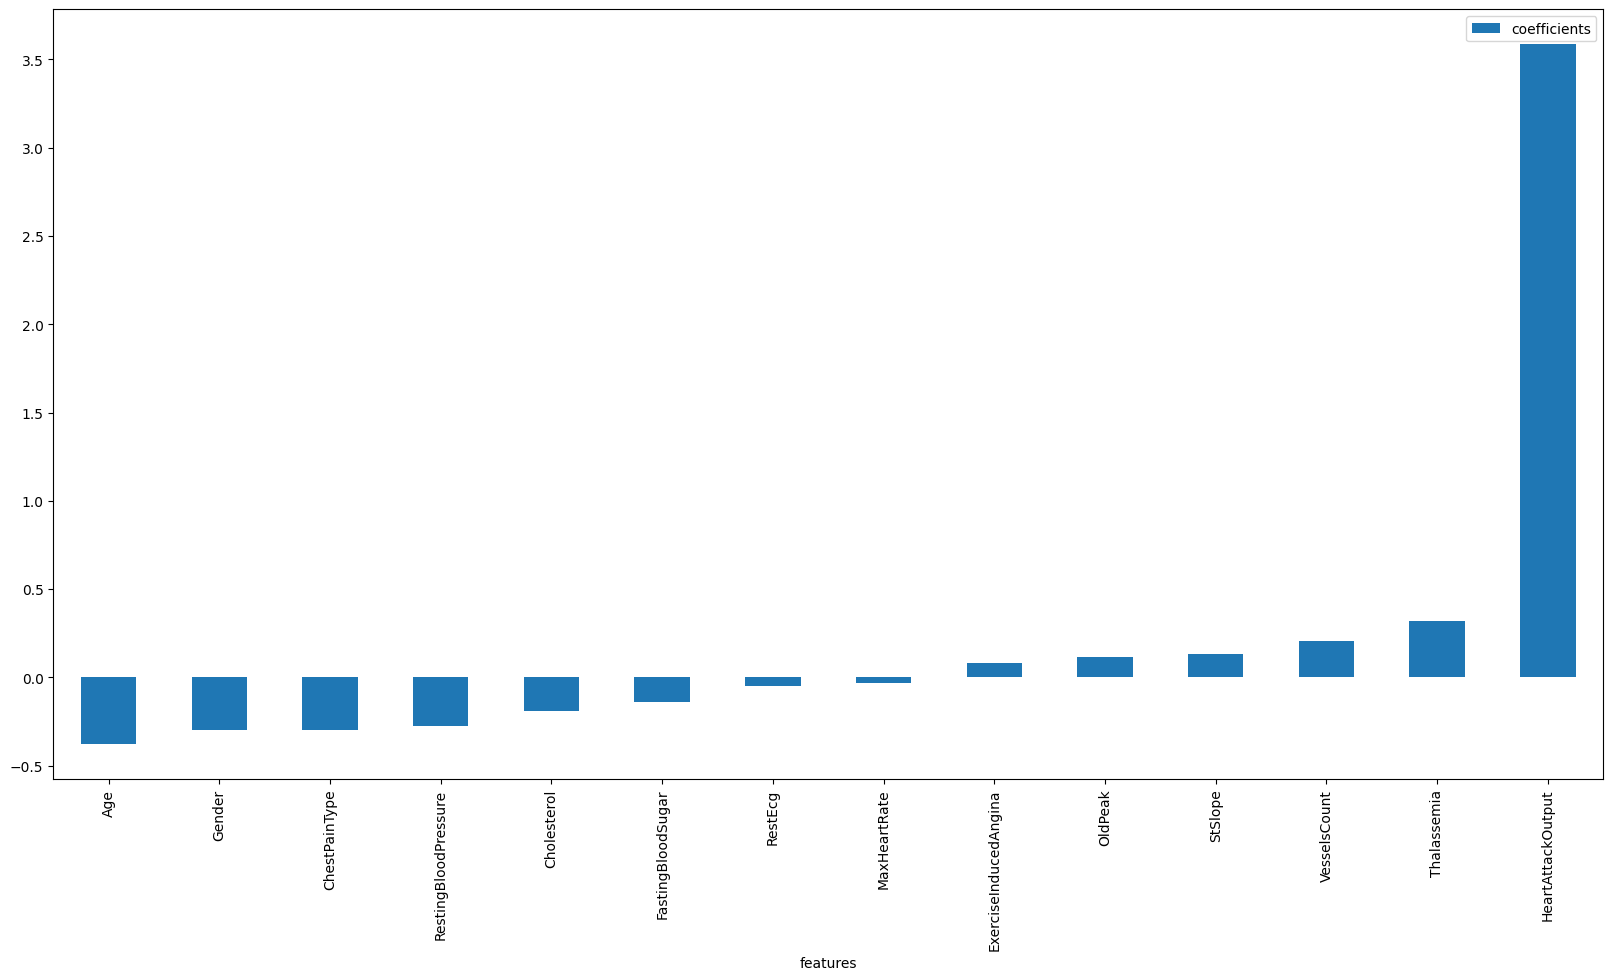

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'features' and 'coefficients' lists
data = {'features': features, 'coefficients': coefficients}
coeff_table = pd.DataFrame(data)
coeff_table = coeff_table.sort_values(by='coefficients')

# Creating the bar plot
coeff_table.plot(kind='bar', x='features', y='coefficients', figsize=[20, 10])
plt.xticks(np.arange(0, 14), features)
plt.show()

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
#Desicion Tree Classifier
dc_clf= DecisionTreeClassifier()
dc_clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling missing values (imputation)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# No need for scaling with Decision Trees

# Create a DecisionTreeClassifier model
dc_clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dc_clf.fit(X_train, Y_train)

# Make predictions on the test data
test_pred_dc = dc_clf.predict(X_test)

mse = mean_squared_error(Y_test, test_pred_dc)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(Y_test, test_pred_dc)
print('Accuracy:', accuracy)

Mean Squared Error: 0.2413793103448276
Accuracy: 0.7586206896551724


In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming Y_test and test_pred_dc are already defined and hold your test labels and predictions, respectively.
accuracy_dc = accuracy_score(Y_test, test_pred_dc)
precision_dc = precision_score(Y_test, test_pred_dc)
recall_dc = recall_score(Y_test, test_pred_dc)
f1_dc = f1_score(Y_test, test_pred_dc)
roc_auc_dc = roc_auc_score(Y_test, test_pred_dc)

print("Decision Tree - Accuracy:", accuracy_dc)
print("Decision Tree - Precision:", precision_dc)
print("Decision Tree - Recall:", recall_dc)
print("Decision Tree - F1-Score:", f1_dc)
print("Decision Tree - ROC AUC:", roc_auc_dc)

Decision Tree - Accuracy: 0.7586206896551724
Decision Tree - Precision: 0.8620689655172413
Decision Tree - Recall: 0.7142857142857143
Decision Tree - F1-Score: 0.78125
Decision Tree - ROC AUC: 0.7701863354037267


In [149]:
cross_val_scores_dc = cross_val_score(dc_clf, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Decision Tree Classifier:", cross_val_scores_dc)
print("Mean Cross-Validation Score:", cross_val_scores_dc.mean())

Cross-Validation Scores for Decision Tree Classifier: [0.82608696 0.91304348 0.7826087  0.67391304 0.66666667]
Mean Cross-Validation Score: 0.772463768115942


In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling missing values (imputation)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# No need for scaling with Random Forest

# Create a RandomForestClassifier model
rf_clf = RandomForestClassifier(random_state=102)

# Fit the model on the training data
rf_clf.fit(X_train, Y_train)

# Make predictions on the test data
rf_pred = rf_clf.predict(X_test)

mse = mean_squared_error(Y_test, rf_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(Y_test, rf_pred)
print('Accuracy:', accuracy)

Mean Squared Error: 0.20689655172413793
Accuracy: 0.7931034482758621


In [152]:
accuracy_rf = accuracy_score(Y_test, rf_pred )
precision_rf = precision_score(Y_test, rf_pred )
recall_rf = recall_score(Y_test, rf_pred )
f1_rf = f1_score(Y_test, rf_pred )
roc_auc_rf = roc_auc_score(Y_test, rf_pred )

print("RandomForestClassifier - Accuracy:", accuracy_rf)
print("RandomForestClassifier - Precision:", precision_rf)
print("RandomForestClassifier - Recall:", recall_rf)
print("RandomForestClassifier- F1-Score:", f1_rf)
print("RandomForestClassifier- ROC AUC:", roc_auc_rf)

RandomForestClassifier - Accuracy: 0.7931034482758621
RandomForestClassifier - Precision: 0.8709677419354839
RandomForestClassifier - Recall: 0.7714285714285715
RandomForestClassifier- F1-Score: 0.8181818181818182
RandomForestClassifier- ROC AUC: 0.7987577639751553


In [153]:
cross_val_scores_dc = cross_val_score(rf_clf, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for RandomForestClassifier:", cross_val_scores_dc)
print("Mean Cross-Validation Score:", cross_val_scores_dc.mean())

Cross-Validation Scores for RandomForestClassifier: [0.82608696 0.84782609 0.80434783 0.82608696 0.68888889]
Mean Cross-Validation Score: 0.798647342995169


In [154]:
# Feature Importance for Decision Tree and Random Forest
if isinstance(dc_clf, (DecisionTreeClassifier, RandomForestClassifier)):
    feature_importance_dc = dc_clf.feature_importances_
    feature_importance_rf = rf_clf.feature_importances_

    # Display feature importance for Decision Tree
    print("\nDecision Tree - Feature Importance:")
    for feature, importance in zip(features, feature_importance_dc):
        print(f"{feature}: {importance}")

    # Display feature importance for Random Forest
    print("\nRandom Forest - Feature Importance:")
    for feature, importance in zip(features, feature_importance_rf):
        print(f"{feature}: {importance}")


Decision Tree - Feature Importance:
Age: 0.14396576625846494
Gender: 0.02330467252234395
ChestPainType: 0.1326387316358938
RestingBloodPressure: 0.016879730179315974
Cholesterol: 0.06105596096392231
FastingBloodSugar: 0.012474462759207348
RestEcg: 0.0330117846224611
MaxHeartRate: 0.09268327822745678
ExerciseInducedAngina: 0.0
OldPeak: 0.060507882277375746
StSlope: 0.008782021782481976
VesselsCount: 0.11515063136565937
Thalassemia: 0.2995450774054166

Random Forest - Feature Importance:
Age: 0.0879621822570554
Gender: 0.04104332327351704
ChestPainType: 0.14643467606363636
RestingBloodPressure: 0.07444654435851565
Cholesterol: 0.07878806342077174
FastingBloodSugar: 0.015922975993351452
RestEcg: 0.016196916937307765
MaxHeartRate: 0.12535031131447233
ExerciseInducedAngina: 0.05592486863918515
OldPeak: 0.0959446015206706
StSlope: 0.039614418569797624
VesselsCount: 0.09874078848720697
Thalassemia: 0.12363032916451189


In [155]:
from sklearn.svm import SVC

In [156]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling missing values (imputation)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale features for SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM model
svm_model = SVC(random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, Y_train)

# Make predictions on the test data
svm_pred = svm_model.predict(X_test)

mse = mean_squared_error(Y_test, svm_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(Y_test, svm_pred)
print('Accuracy:', accuracy)

Mean Squared Error: 0.20689655172413793
Accuracy: 0.7931034482758621


In [157]:
accuracy_svm = accuracy_score(Y_test, svm_pred )
precision_svm = precision_score(Y_test, svm_pred )
recall_svm = recall_score(Y_test, svm_pred )
f1_svm = f1_score(Y_test, svm_pred )
roc_auc_svm = roc_auc_score(Y_test, svm_pred )

print("SVM model - Accuracy:", accuracy_svm)
print("SVM model - Precision:", precision_svm)
print("SVM model - Recall:", recall_svm)
print("SVM model- F1-Score:", f1_svm)
print("SVM model- ROC AUC:", roc_auc_svm)

SVM model - Accuracy: 0.7931034482758621
SVM model - Precision: 0.8484848484848485
SVM model - Recall: 0.8
SVM model- F1-Score: 0.8235294117647058
SVM model- ROC AUC: 0.791304347826087


In [158]:
cross_val_scores_dc = cross_val_score(svm_model, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for SVM model:", cross_val_scores_dc)
print("Mean Cross-Validation Score:", cross_val_scores_dc.mean())

Cross-Validation Scores for SVM model: [0.86956522 0.89130435 0.80434783 0.80434783 0.75555556]
Mean Cross-Validation Score: 0.8250241545893718


In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling missing values (imputation)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale features for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

# Predict with KNN
knn_pred = knn_model.predict(X_test)

mse = mean_squared_error(Y_test, knn_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(Y_test, knn_pred)
print("KNN - Accuracy:", accuracy)

Mean Squared Error: 0.22413793103448276
KNN - Accuracy: 0.7758620689655172


In [160]:
accuracy_knn = accuracy_score(Y_test, knn_pred )
precision_knn = precision_score(Y_test, knn_pred )
recall_knn = recall_score(Y_test, knn_pred )
f1_knn = f1_score(Y_test, knn_pred )
roc_auc_knn = roc_auc_score(Y_test, knn_pred )

print("KNeighborsClassifier - Accuracy:", accuracy_rf)
print("KNeighborsClassifier - Precision:", precision_rf)
print("KNeighborsClassifier - Recall:", recall_rf)
print("KNeighborsClassifier- F1-Score:", f1_rf)
print("KNeighborsClassifier- ROC AUC:", roc_auc_rf)

KNeighborsClassifier - Accuracy: 0.7931034482758621
KNeighborsClassifier - Precision: 0.8709677419354839
KNeighborsClassifier - Recall: 0.7714285714285715
KNeighborsClassifier- F1-Score: 0.8181818181818182
KNeighborsClassifier- ROC AUC: 0.7987577639751553


In [161]:
cross_val_scores_dc = cross_val_score(knn_model, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for KNeighborsClassifier:", cross_val_scores_dc)
print("Mean Cross-Validation Score:", cross_val_scores_dc.mean())

Cross-Validation Scores for KNeighborsClassifier: [0.86956522 0.7826087  0.76086957 0.7826087  0.8       ]
Mean Cross-Validation Score: 0.7991304347826087


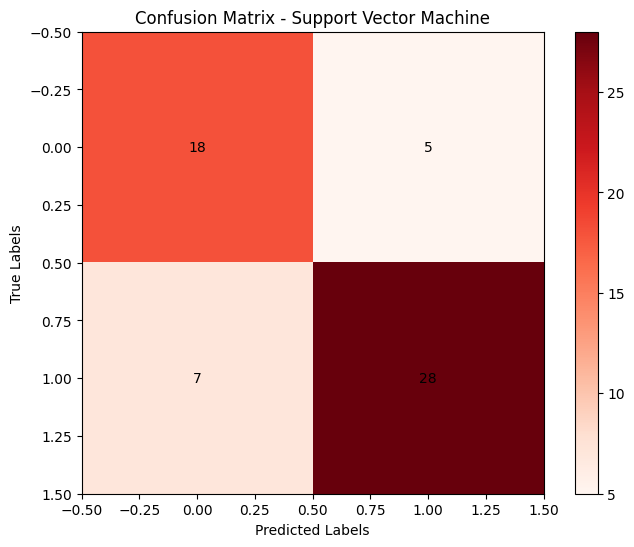

In [162]:
import matplotlib.pyplot as plt

# Assuming svm_pred is your SVM model predictions
conf_matrix_svm = confusion_matrix(Y_test, svm_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_svm, cmap='Reds', interpolation='nearest')

# Add annotations
for i in range(len(conf_matrix_svm)):
    for j in range(len(conf_matrix_svm[0])):
        plt.text(j, i, str(conf_matrix_svm[i][j]), ha='center', va='center', color='black')

# Add color bar
plt.colorbar()

# Add title and labels
plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

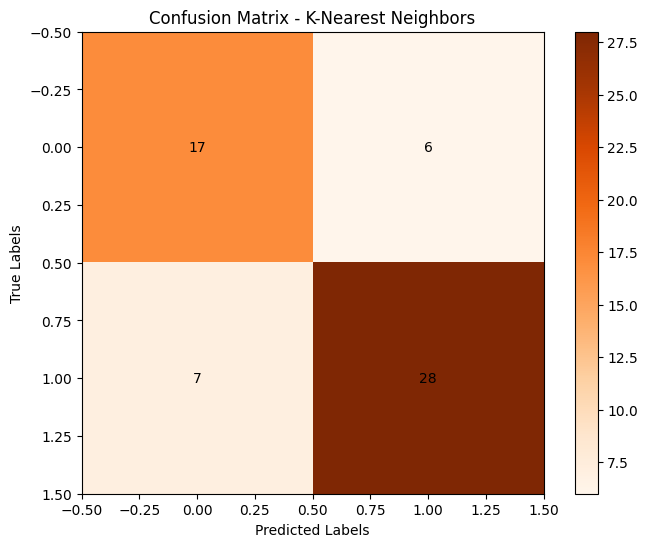

In [163]:
import matplotlib.pyplot as plt

# Assuming knn_pred is your KNN model predictions
conf_matrix_knn = confusion_matrix(Y_test, knn_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_knn, cmap='Oranges', interpolation='nearest')

# Add annotations
for i in range(len(conf_matrix_knn)):
    for j in range(len(conf_matrix_knn[0])):
        plt.text(j, i, str(conf_matrix_knn[i][j]), ha='center', va='center', color='black')

# Add color bar
plt.colorbar()

# Add title and labels
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

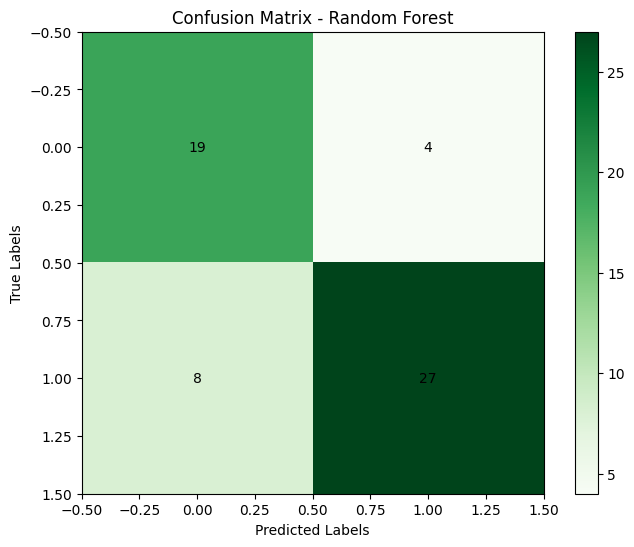

In [164]:
import matplotlib.pyplot as plt

# Assuming rf_pred is your Random Forest model predictions
conf_matrix_rf = confusion_matrix(Y_test, rf_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_rf, cmap='Greens', interpolation='nearest')

# Add annotations
for i in range(len(conf_matrix_rf)):
    for j in range(len(conf_matrix_rf[0])):
        plt.text(j, i, str(conf_matrix_rf[i][j]), ha='center', va='center', color='black')

# Add color bar
plt.colorbar()

# Add title and labels
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Assuming you have already split your data into training and testing sets
# and you have features X_train, X_test, and target variables Y_train, Y_test

# Create and train your Decision Tree model
best_dc_model = DecisionTreeClassifier()  # Replace with your actual tuned model
best_dc_model.fit(X_train, Y_train)

# Now you can use it for cross-validation
cross_val_scores_dc = cross_val_score(best_dc_model, X_train, Y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores for Decision Tree Classifier:", cross_val_scores_dc)
print("Mean Cross-Validation Score:", cross_val_scores_dc.mean())

Cross-Validation Scores for Decision Tree Classifier: [0.80434783 0.93478261 0.73913043 0.73913043 0.66666667]
Mean Cross-Validation Score: 0.7768115942028986


In [166]:
from sklearn.model_selection import cross_val_score

# Assuming rf_clf is your RandomForestClassifier model
cross_val_scores_rf = cross_val_score(rf_clf, X_train, Y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores for Random Forest Classifier:", cross_val_scores_rf)
print("Mean Cross-Validation Score:", cross_val_scores_rf.mean())

Cross-Validation Scores for Random Forest Classifier: [0.82608696 0.84782609 0.80434783 0.82608696 0.68888889]
Mean Cross-Validation Score: 0.798647342995169


In [167]:
from sklearn.model_selection import cross_val_score

# Assuming svm_model is your SVM model
cross_val_scores_svm = cross_val_score(svm_model, X_train, Y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores for Support Vector Machine:", cross_val_scores_svm)
print("Mean Cross-Validation Score:", cross_val_scores_svm.mean())

Cross-Validation Scores for Support Vector Machine: [0.86956522 0.89130435 0.80434783 0.80434783 0.75555556]
Mean Cross-Validation Score: 0.8250241545893718


In [168]:
from sklearn.model_selection import cross_val_score

# Assuming knn_model is your KNN model
cross_val_scores_knn = cross_val_score(knn_model, X_train, Y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores for K-Nearest Neighbors:", cross_val_scores_knn)
print("Mean Cross-Validation Score:", cross_val_scores_knn.mean())

Cross-Validation Scores for K-Nearest Neighbors: [0.86956522 0.7826087  0.76086957 0.7826087  0.8       ]
Mean Cross-Validation Score: 0.7991304347826087


In [169]:
# Assuming you have already trained your DecisionTreeClassifier model and stored it in dc_clf
dc_pred = dc_clf.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_dc = confusion_matrix(Y_test, dc_pred)
tn, fp, fn, tp = cm_dc.ravel()

print("Confusion Matrix for Decision Tree:")
print(cm_dc)
print(f"True Negative: {tn}, False Positive: {fp}, False Negative: {fn}, True Positive: {tp}")

Confusion Matrix for Decision Tree:
[[19  4]
 [25 10]]
True Negative: 19, False Positive: 4, False Negative: 25, True Positive: 10


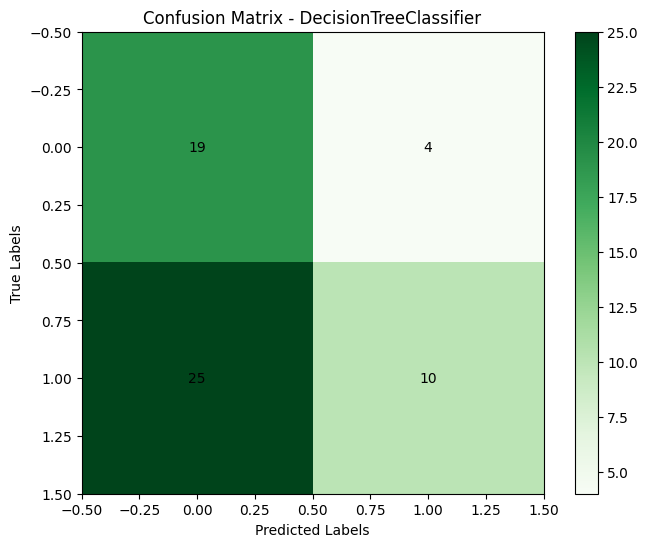

In [170]:
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_dc, cmap='Greens', interpolation='nearest')

# Add annotations
for i in range(len(cm_dc)):
    for j in range(len(cm_dc[0])):
        plt.text(j, i, str(cm_dc[i][j]), ha='center', va='center', color='black')

# Add color bar
plt.colorbar()

# Add labels
plt.title("Confusion Matrix - DecisionTreeClassifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

In [171]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_dc = precision_score(Y_test, dc_pred)
recall_dc = recall_score(Y_test, dc_pred)
f1_dc = f1_score(Y_test, dc_pred)

print("Precision:", precision_dc)
print("Recall:", recall_dc)
print("F1-Score:", f1_dc)

Precision: 0.7142857142857143
Recall: 0.2857142857142857
F1-Score: 0.40816326530612246


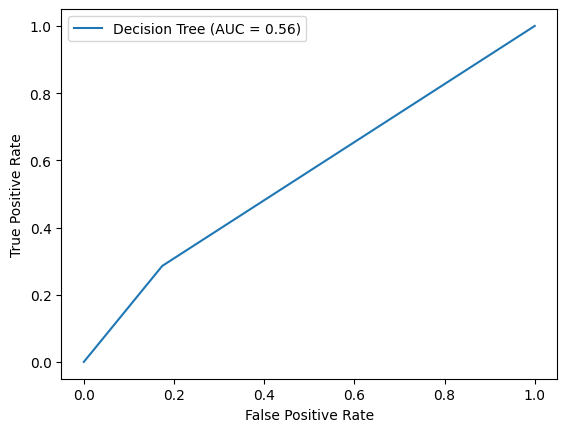

In [172]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_dc, tpr_dc, _ = roc_curve(Y_test, dc_pred)
auc_dc = roc_auc_score(Y_test, dc_pred)

plt.plot(fpr_dc, tpr_dc, label=f'Decision Tree (AUC = {auc_dc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [173]:
from sklearn.model_selection import cross_val_score

cross_val_scores_dc = cross_val_score(dc_clf, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Decision Tree Classifier:", cross_val_scores_dc)

Cross-Validation Scores for Decision Tree Classifier: [0.82608696 0.91304348 0.7826087  0.67391304 0.66666667]


<Figure size 2000x1500 with 0 Axes>

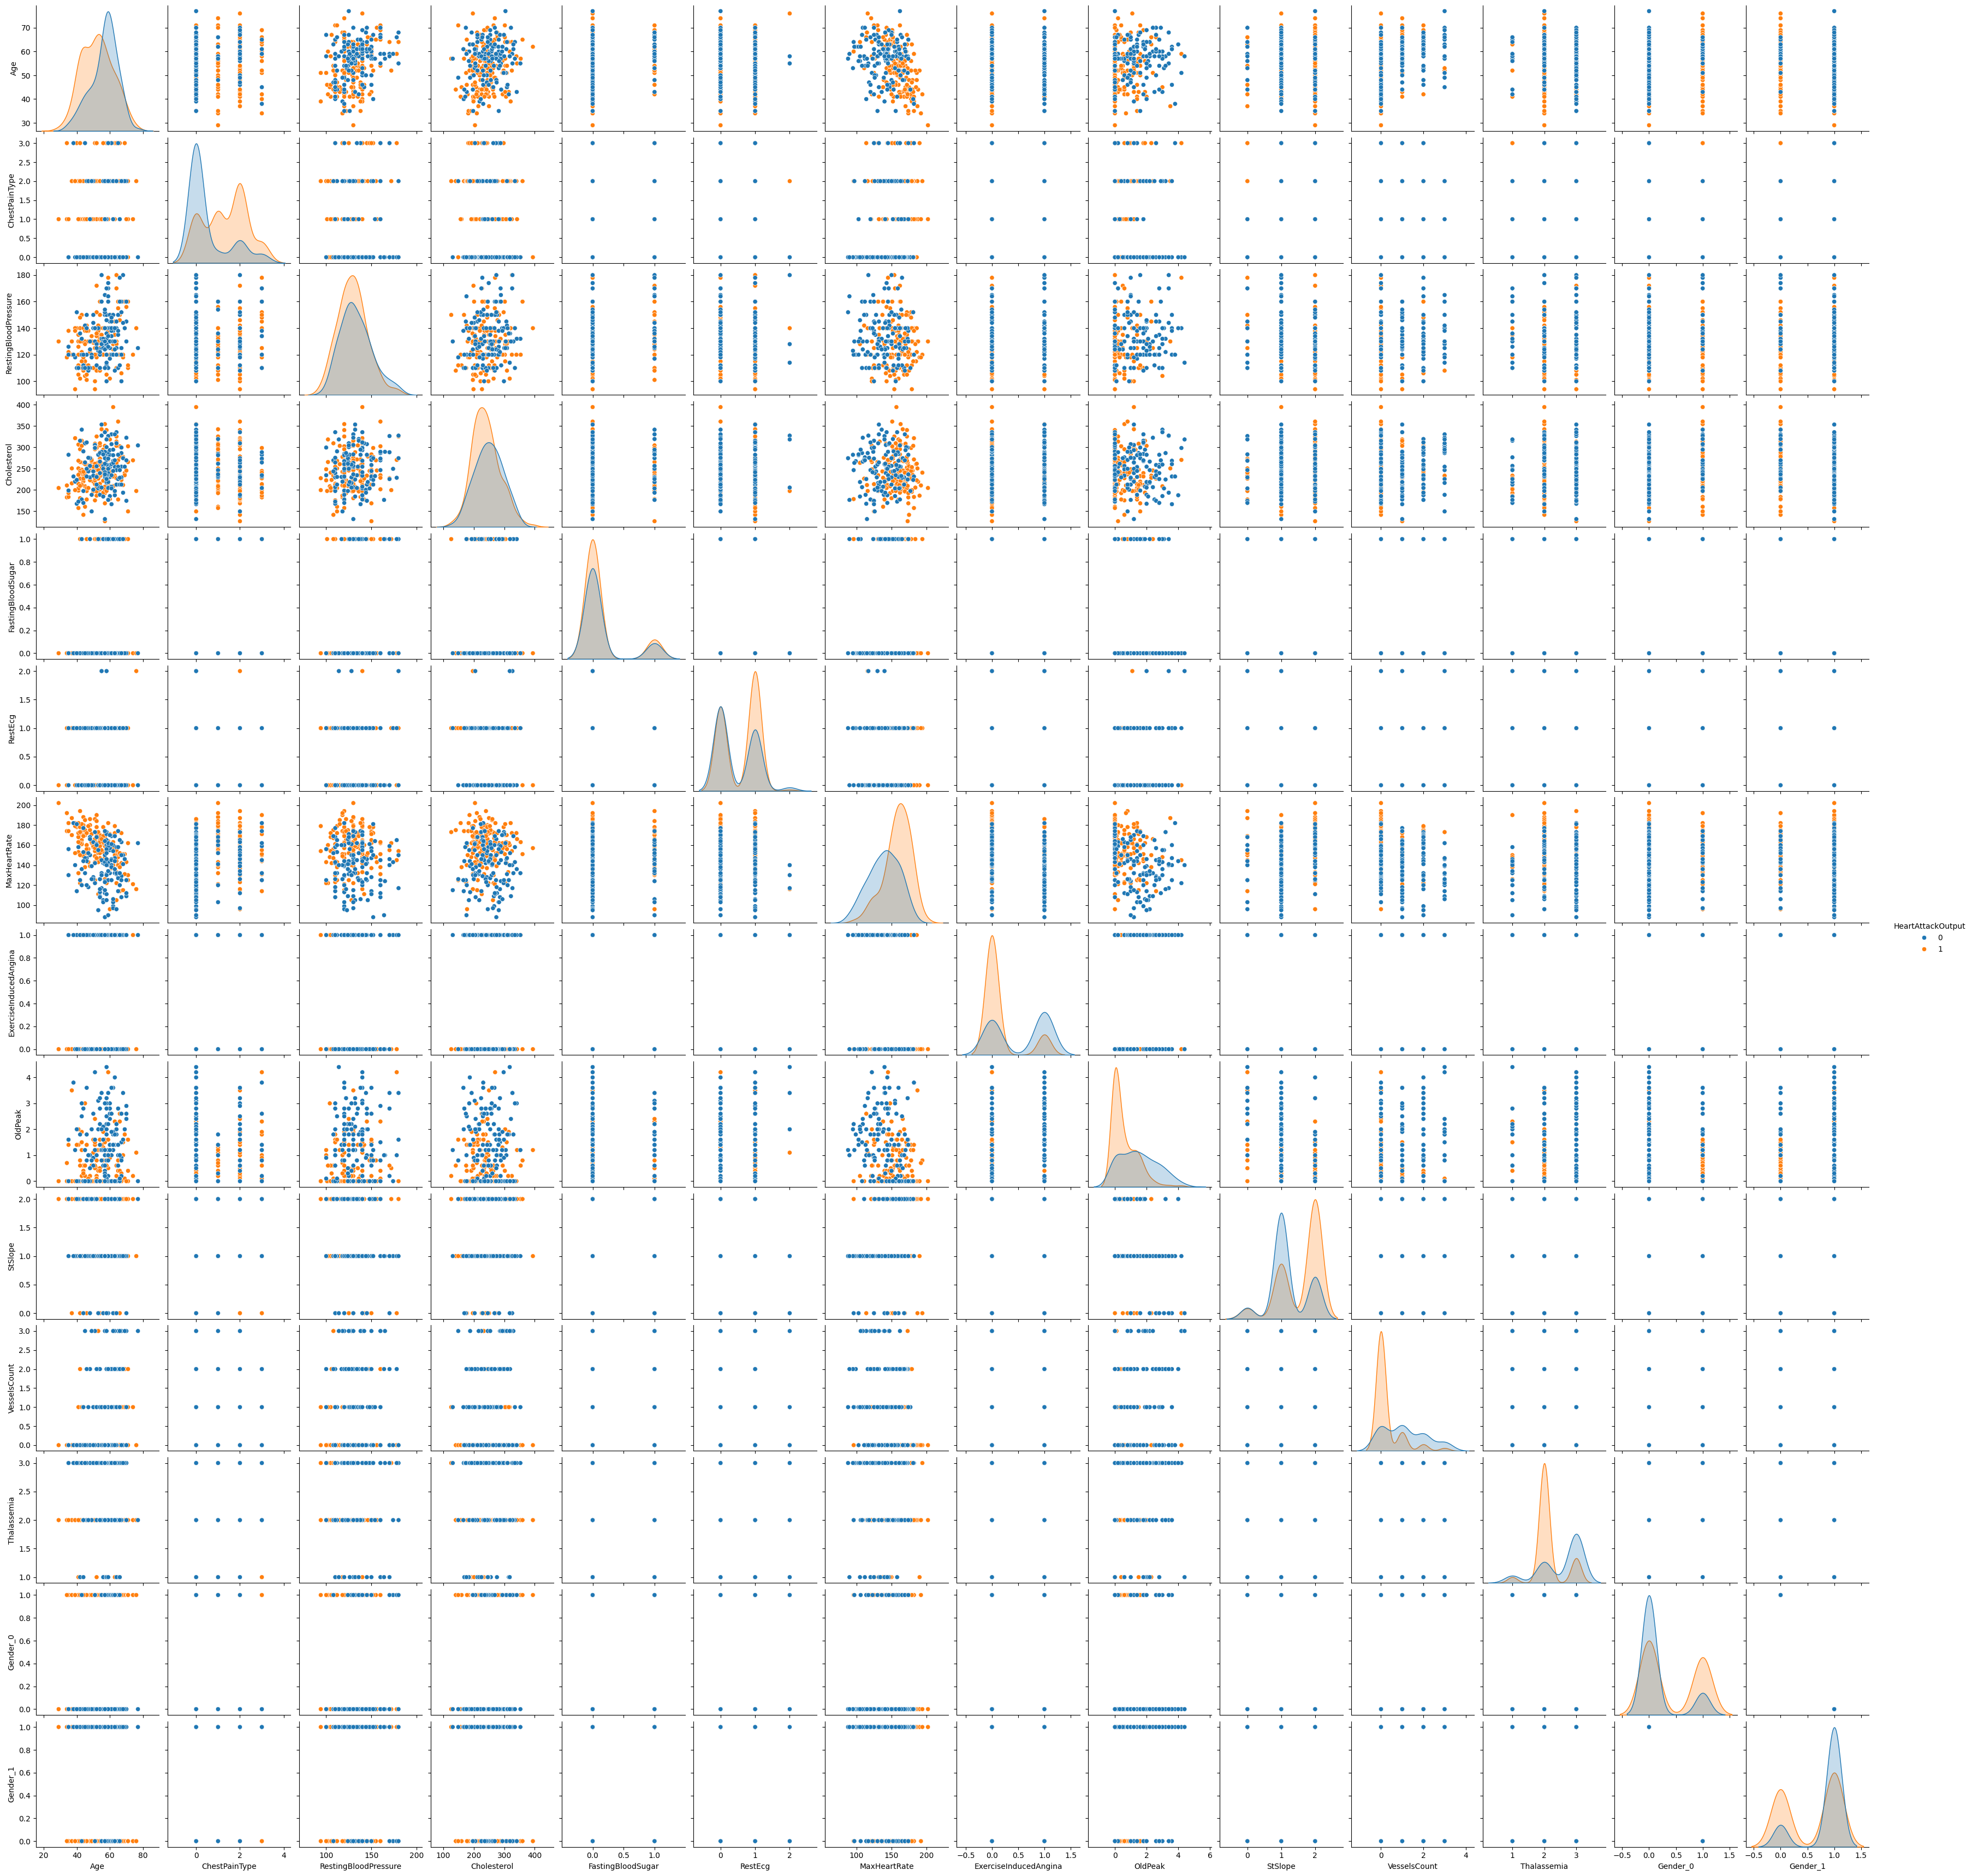

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for pair plot with larger figure size
plt.figure(figsize=(20, 15))
sns.pairplot(data=df_heart, hue='HeartAttackOutput')
plt.show()

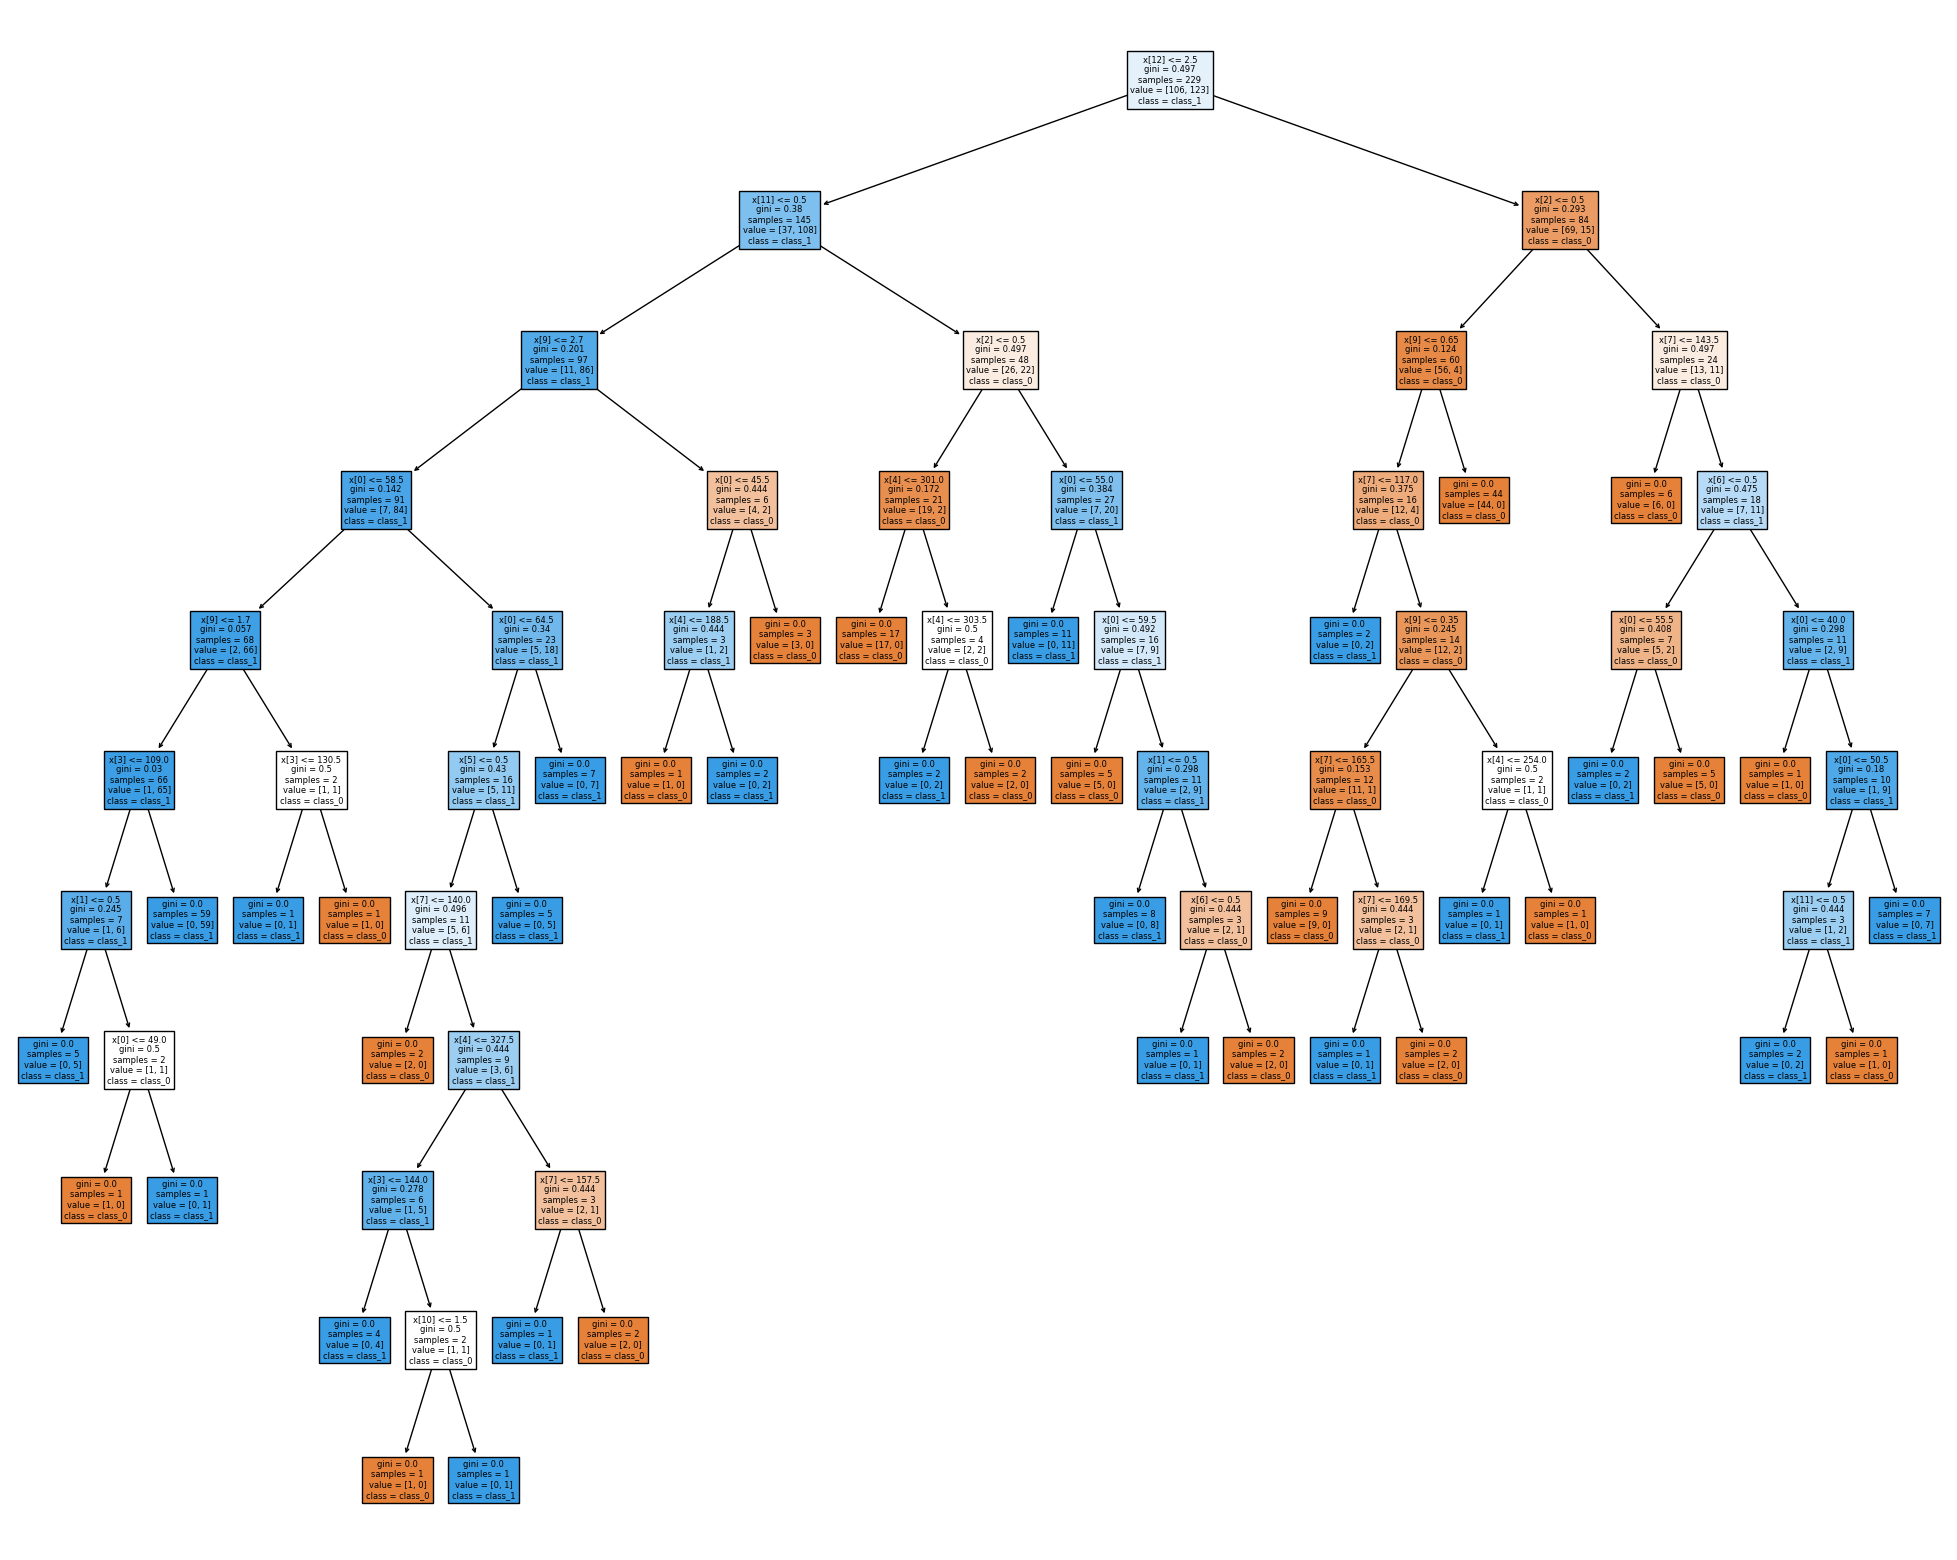

In [175]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 20))
plot_tree(dc_clf, filled=True, class_names=['class_0', 'class_1'])
plt.show()

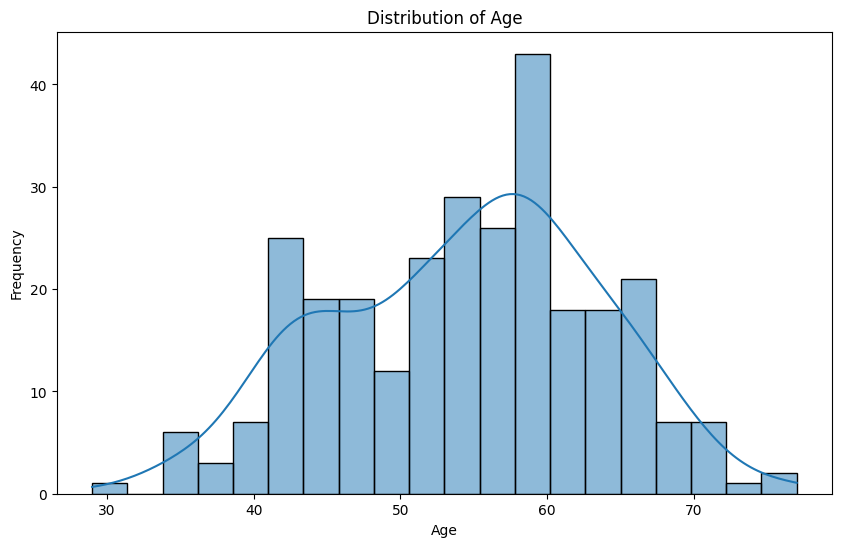

In [176]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Visualize the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df_heart['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

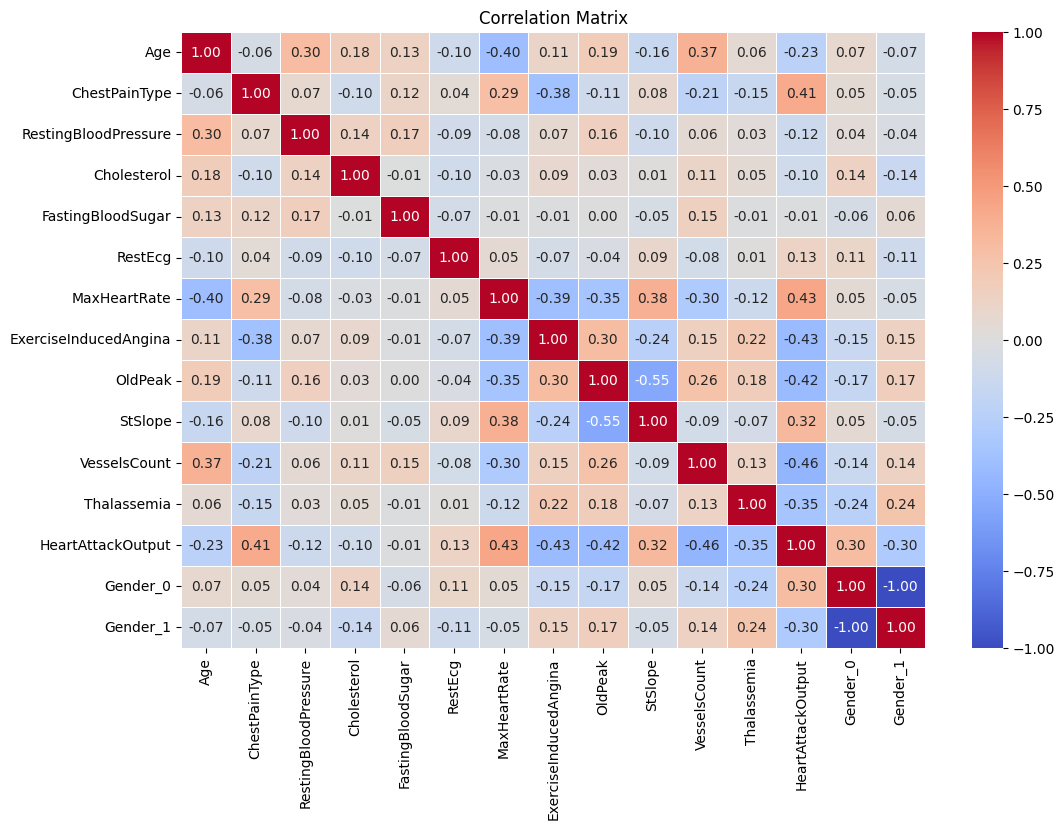

In [177]:
# Visualize the correlation matrix
correlation_matrix = df_heart.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

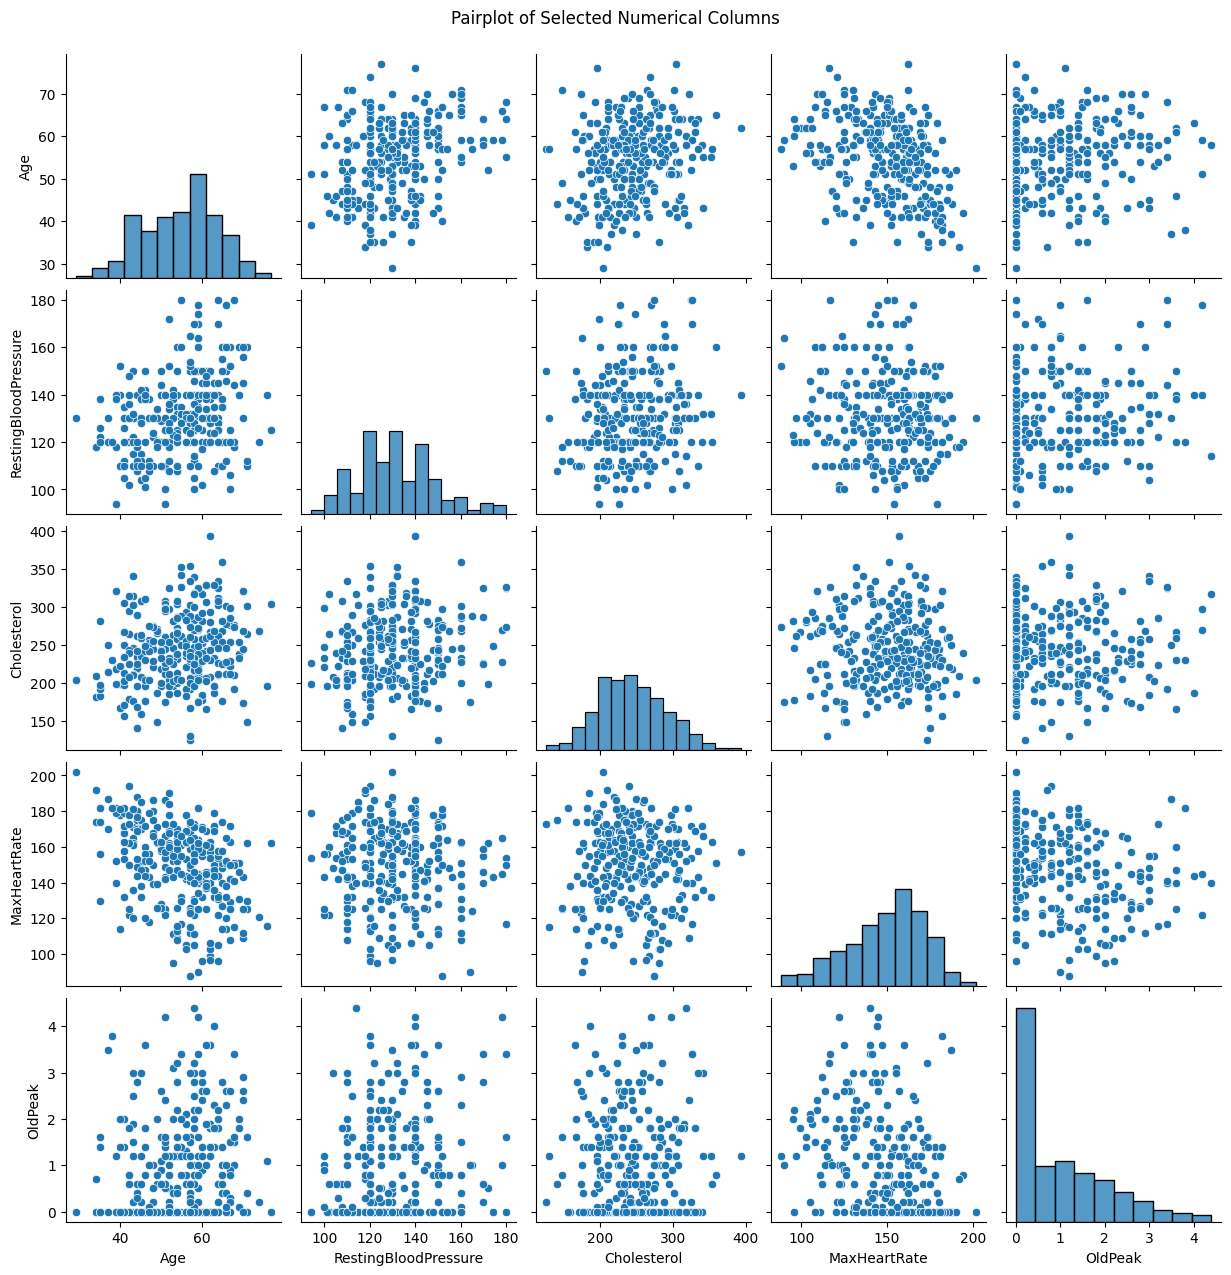

In [178]:
# Visualize the pairplot for selected numerical columns
sns.pairplot(df_heart[['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']])
plt.suptitle('Pairplot of Selected Numerical Columns', y=1.02)
plt.show()

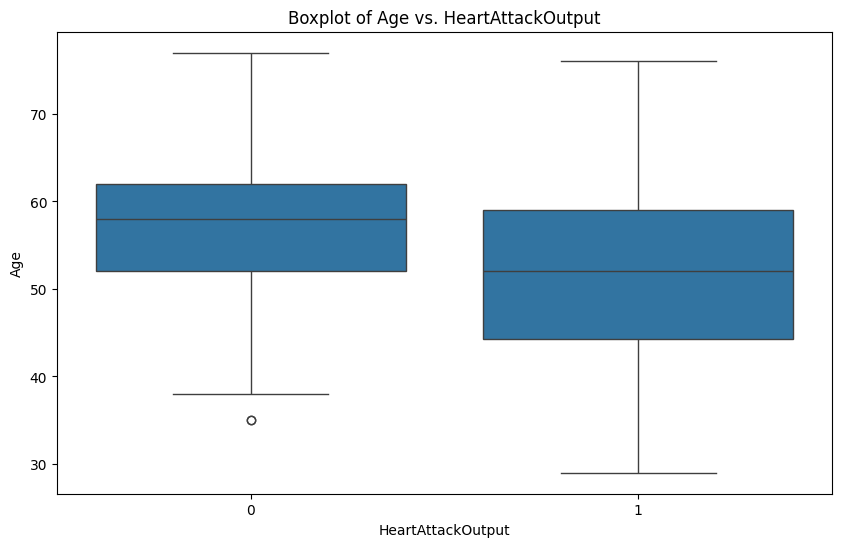

In [179]:
# Boxplot for Age vs. HeartAttackOutput
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartAttackOutput', y='Age', data=df_heart)
plt.title('Boxplot of Age vs. HeartAttackOutput')
plt.xlabel('HeartAttackOutput')
plt.ylabel('Age')
plt.show()

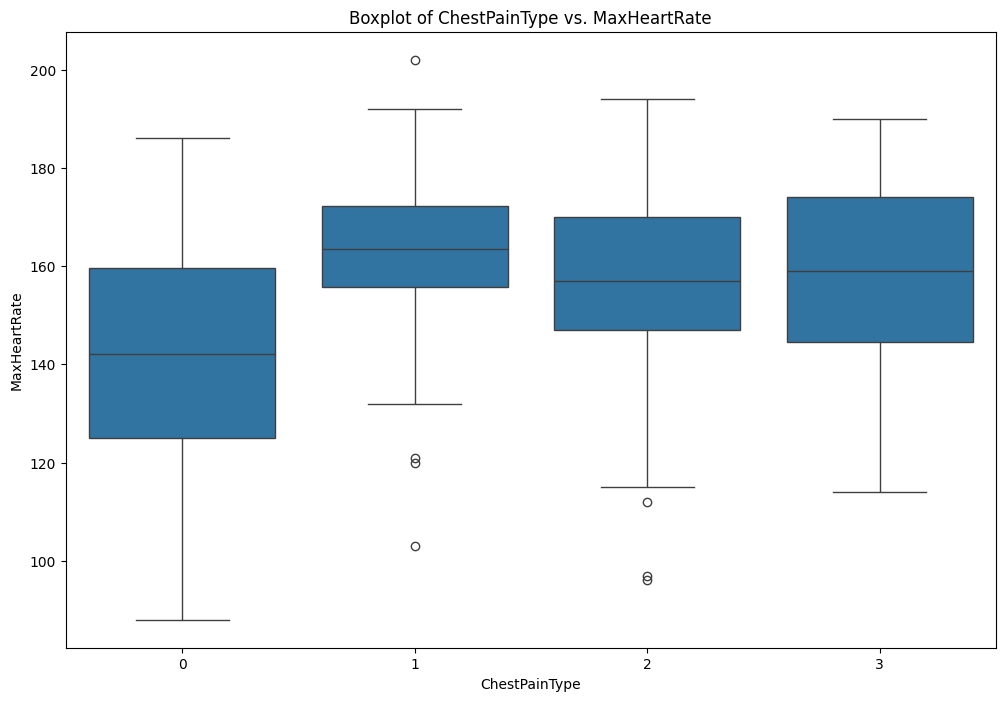

In [180]:
# Boxplot for ChestPainType vs. MaxHeartRate
plt.figure(figsize=(12, 8))
sns.boxplot(x='ChestPainType', y='MaxHeartRate', data=df_heart)
plt.title('Boxplot of ChestPainType vs. MaxHeartRate')
plt.xlabel('ChestPainType')
plt.ylabel('MaxHeartRate')
plt.show()

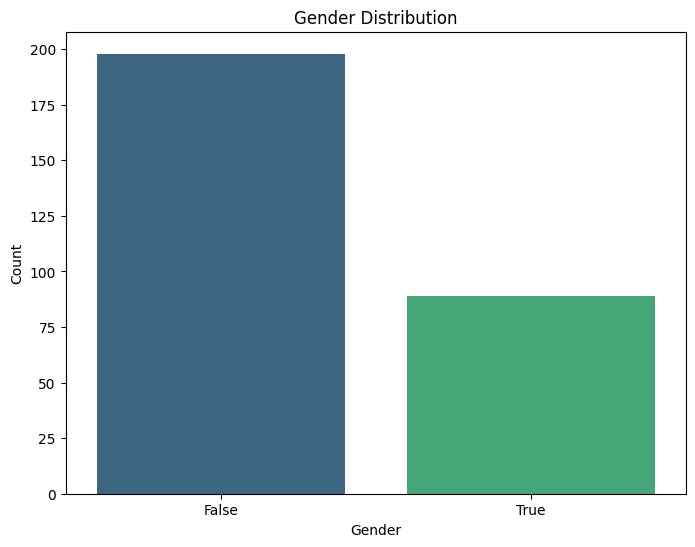

In [181]:
# Bar plot for the Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender_0', data=df_heart, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

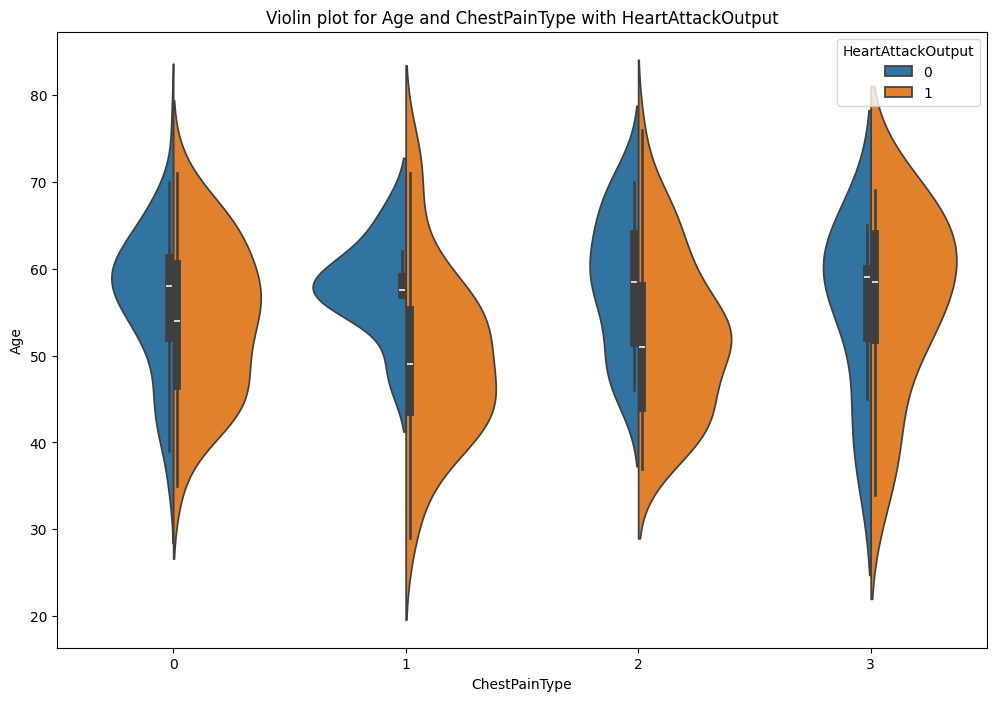

In [182]:
# Violin plot for Age and ChestPainType
plt.figure(figsize=(12, 8))
sns.violinplot(x='ChestPainType', y='Age', data=df_heart, hue='HeartAttackOutput', split=True)
plt.title('Violin plot for Age and ChestPainType with HeartAttackOutput')
plt.xlabel('ChestPainType')
plt.ylabel('Age')
plt.show()

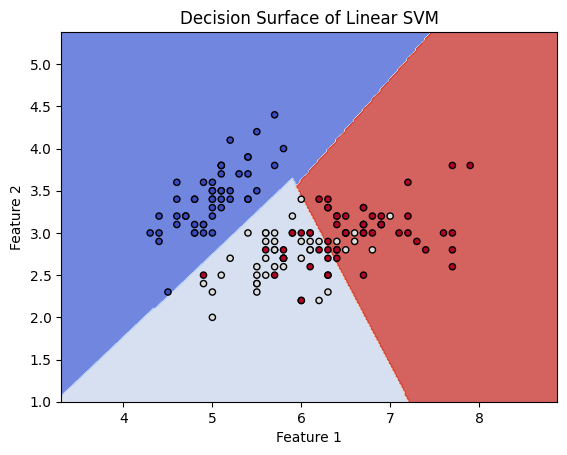

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Load the Iris dataset (you can replace this with your own data)
iris = load_iris()
X = iris.data[:, :2]  # Select the first two features
y = iris.target

# Create meshgrid for plotting
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Fit an SVM model
model = SVC(kernel='linear')
clf = model.fit(X, y)

# Plot decision boundary
fig, ax = plt.subplots()
xx, yy = make_meshgrid(X[:, 0], X[:, 1])
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Feature 2')
ax.set_xlabel('Feature 1')
ax.set_title('Decision Surface of Linear SVM')
plt.show()

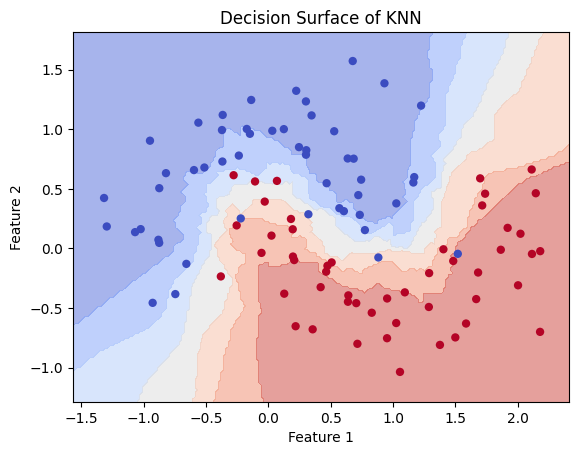

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and split data (you can replace this with your own data)
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run our model
margin = 0.25
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
mesh_size = 0.02
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.coolwarm, lw=0)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Surface of KNN')
plt.show()

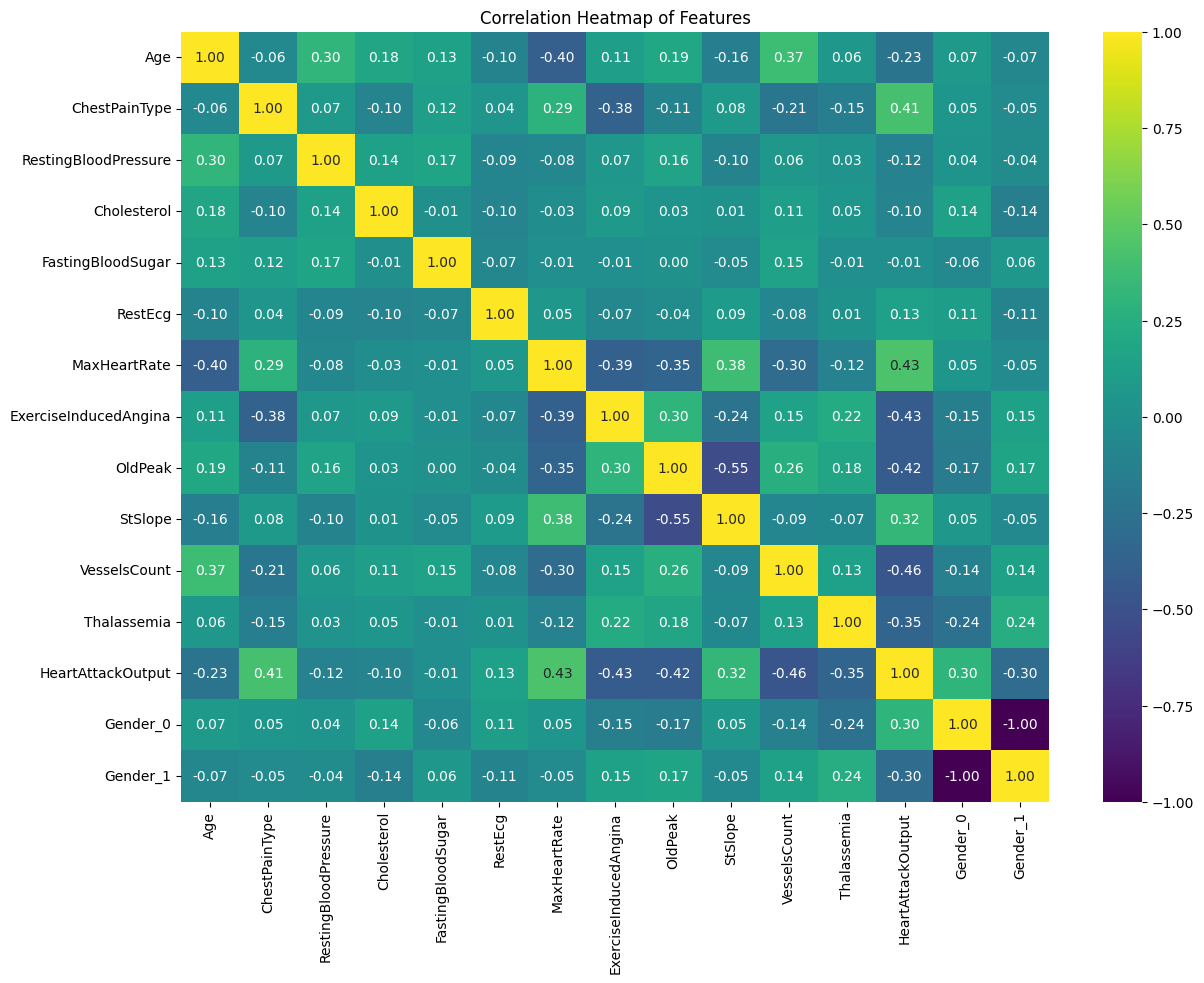

In [185]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_heart.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

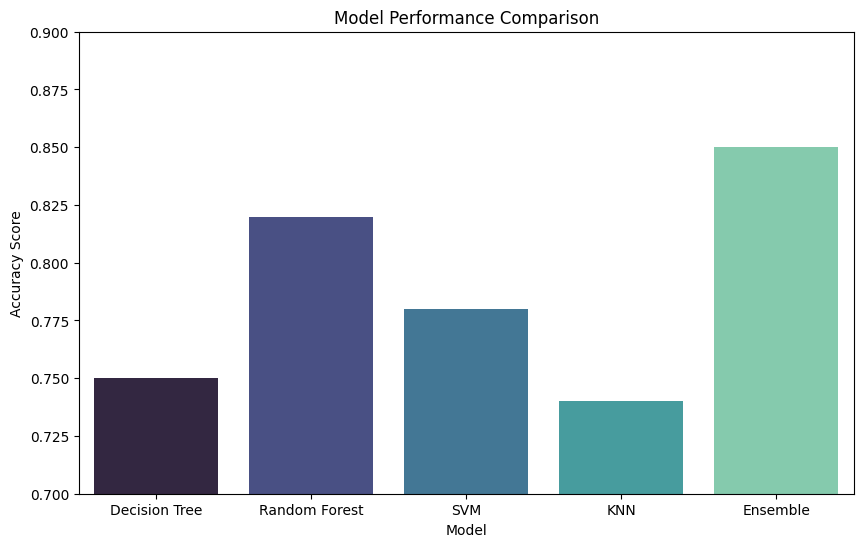

In [186]:
import numpy as np

models = ['Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Ensemble']
accuracy_scores = [0.75, 0.82, 0.78, 0.74, 0.85]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores, palette='mako')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0.7, 0.9)
plt.show()